## Importing Librarires

In [1]:
## importing librarirs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pylab import rcParams

import plotly_express as px
from pandas.plotting import autocorrelation_plot
from math import sqrt

from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%config InlineBackend.figure_format ='retina'

## Importing the dataset.

In [2]:
worldwide_cases=pd.read_csv('/kaggle/input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv') 
detected_cases= pd.read_csv('/kaggle/input/monkeypox-dataset-daily-updated/Worldwide_Case_Detection_Timeline.csv')
confirmed_daily_cases=pd.read_csv('/kaggle/input/monkeypox-dataset-daily-updated/Daily_Country_Wise_Confirmed_Cases.csv') 

## Reading the dataset.

In [3]:
## reading the dataframe "worlwide_cases" to analize and understand the data.
worldwide_cases.head(10)

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2050.0,0.0,5.0,2.0,7.0
1,Portugal,515.0,0.0,0.0,0.0,34.0
2,Spain,3125.0,0.0,11.0,2.0,0.0
3,United States,2316.0,0.0,4.0,34.0,6.0
4,Canada,604.0,9.0,1.0,2.0,0.0
5,Sweden,77.0,0.0,0.0,0.0,0.0
6,Italy,374.0,1.0,18.0,19.0,4.0
7,France,1448.0,0.0,1.0,2.0,1.0
8,Belgium,311.0,1.0,2.0,1.0,0.0
9,Australia,41.0,0.0,2.0,8.0,0.0


In [4]:
## Checking the number of rows and columns.
worldwide_cases.shape

(98, 6)

In [5]:
## Checking the datatype of the attributes in the "worlwide_cases" dataframe.
worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             98 non-null     object 
 1   Confirmed_Cases     98 non-null     float64
 2   Suspected_Cases     98 non-null     float64
 3   Hospitalized        98 non-null     float64
 4   Travel_History_Yes  98 non-null     float64
 5   Travel_History_No   98 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.7+ KB


#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are no null values in the dataset.

In [6]:
## reading the dataframe "detected_cases" to analize and understand the data.
detected_cases.head(50)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
5,2022-02-28,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-03-04,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-03-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-03-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Checking the number of rows and columns.
detected_cases.shape

(15861, 9)

In [8]:
## Checking the datatype of the attributes in the "detected_cases" dataframe.
detected_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        15861 non-null  object
 1   Country                  15861 non-null  object
 2   City                     760 non-null    object
 3   Age                      2153 non-null   object
 4   Gender                   1530 non-null   object
 5   Symptoms                 132 non-null    object
 6   Hospitalised (Y/N/NA)    196 non-null    object
 7   Isolated (Y/N/NA)        311 non-null    object
 8   Travel_history (Y/N/NA)  256 non-null    object
dtypes: object(9)
memory usage: 1.1+ MB


#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are several null values in the dataset.

In [9]:
## reading the dataframe confirmed_daily_cases" to analize and understand the data.
confirmed_daily_cases.head(10)

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-1-31
0,Nigeria,2,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,1
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,118,0,0,0,272,0,0,0
5,Democratic Republic Of The Congo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Portugal,0,0,0,0,0,0,0,0,0,...,42,0,0,0,0,0,0,0,0,0
7,Spain,0,0,0,0,0,0,0,0,0,...,0,0,388,0,0,0,290,0,0,0
8,United States,0,0,0,0,0,0,0,0,0,...,123,184,358,0,0,153,121,255,0,0
9,Belgium,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,87,0,0,0,0


In [10]:
## Checking the number of rows and columns.
confirmed_daily_cases.shape

(74, 80)

In [11]:
## Checking the datatype of the attributes in the "detected_cases" dataframe.
confirmed_daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     74 non-null     object
 1   2022-01-31  74 non-null     int64 
 2   2022-02-17  74 non-null     int64 
 3   2022-02-28  74 non-null     int64 
 4   2022-03-04  74 non-null     int64 
 5   2022-03-31  74 non-null     int64 
 6   2022-04-10  74 non-null     int64 
 7   2022-04-12  74 non-null     int64 
 8   2022-04-30  74 non-null     int64 
 9   2022-05-06  74 non-null     int64 
 10  2022-05-08  74 non-null     int64 
 11  2022-05-12  74 non-null     int64 
 12  2022-05-13  74 non-null     int64 
 13  2022-05-15  74 non-null     int64 
 14  2022-05-17  74 non-null     int64 
 15  2022-05-18  74 non-null     int64 
 16  2022-05-19  74 non-null     int64 
 17  2022-05-20  74 non-null     int64 
 18  2022-05-21  74 non-null     int64 
 19  2022-05-23  74 non-null     int64 
 20  2022-05-24  

#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are no null values in the dataset.

### Checking the number of duplicates in each of the dataframe.

In [12]:
print(f"No of Duplicates in the 'worldwide_cases' dataset :- {worldwide_cases.duplicated().sum()}")

No of Duplicates in the 'worldwide_cases' dataset :- 0


In [13]:
print(f"No of Duplicates in the 'detected_cases' dataset :- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' dataset :- 14781


In [14]:
print(f"No of Duplicates in the 'confirmed_daily_cases' dataset :- {confirmed_daily_cases.duplicated().sum()}")

No of Duplicates in the 'confirmed_daily_cases' dataset :- 0


#### Inference:-

- From the above analysis we can observe that the "detected_cases" dataframe has quite a few duplicate values in it.
- The other two datasets dont have any duplicate values in them.

In [15]:
## Removing the set of duplicate elements from the "detected_cases" dataframe.
detected_cases=detected_cases.drop_duplicates()

In [16]:
## Checking the number of duplicates post removing them from the "detected_cases" dataframe.
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 0


In [17]:
## Checking the minimium, maximum, unquie and top values of various attributes in the "detected_cases" dataframe.
detected_cases.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,1080,1080,287,391,426,70,127,224,212
unique,79,74,138,59,5,55,2,1,2
top,2022-06-23,United States,Toronto,20-69,male,vesicular rash,N,Y,Y
freq,37,161,16,69,415,4,64,224,169


# Working on the "worldwide_cases" dataframe.

In [18]:
worldwide_cases.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2050.0,0.0,5.0,2.0,7.0
1,Portugal,515.0,0.0,0.0,0.0,34.0
2,Spain,3125.0,0.0,11.0,2.0,0.0
3,United States,2316.0,0.0,4.0,34.0,6.0
4,Canada,604.0,9.0,1.0,2.0,0.0


In [19]:
worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             98 non-null     object 
 1   Confirmed_Cases     98 non-null     float64
 2   Suspected_Cases     98 non-null     float64
 3   Hospitalized        98 non-null     float64
 4   Travel_History_Yes  98 non-null     float64
 5   Travel_History_No   98 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.7+ KB


In [20]:
## printing the column names of the "worldwide_cases" dataframe.
print(worldwide_cases.columns)

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')


In [21]:
t=['Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No']

In [22]:
## Outlier Analysis function
def outlier_func(inp):
    plt.figure(figsize=[10,8])
    sns.boxplot(data= worldwide_cases, y=inp)
    plt.title("Distribution of {}".format(inp))
    plt.ylabel("Count")
    plt.xlabel("{}".format(inp))
    plt.show()
    

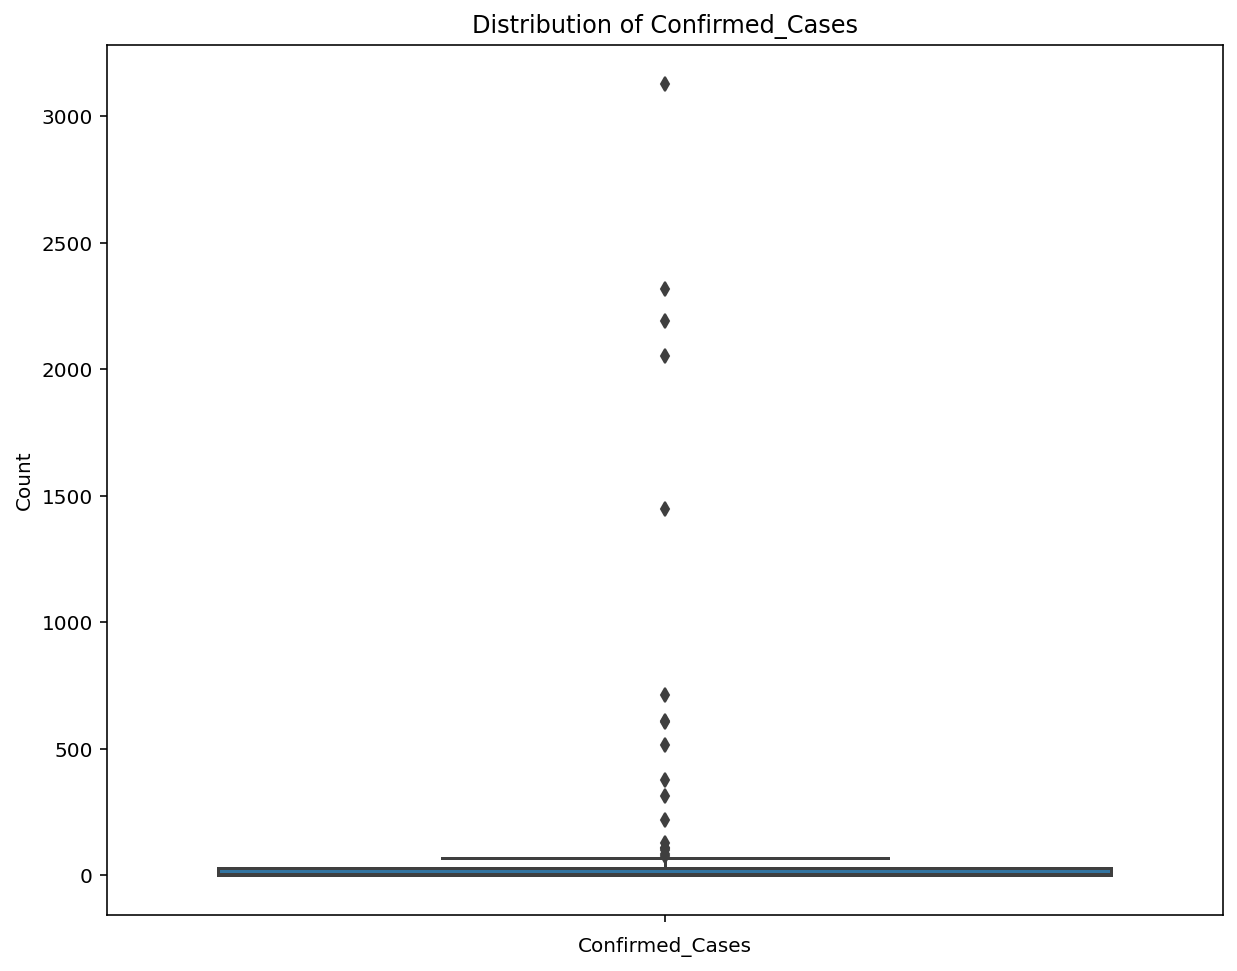

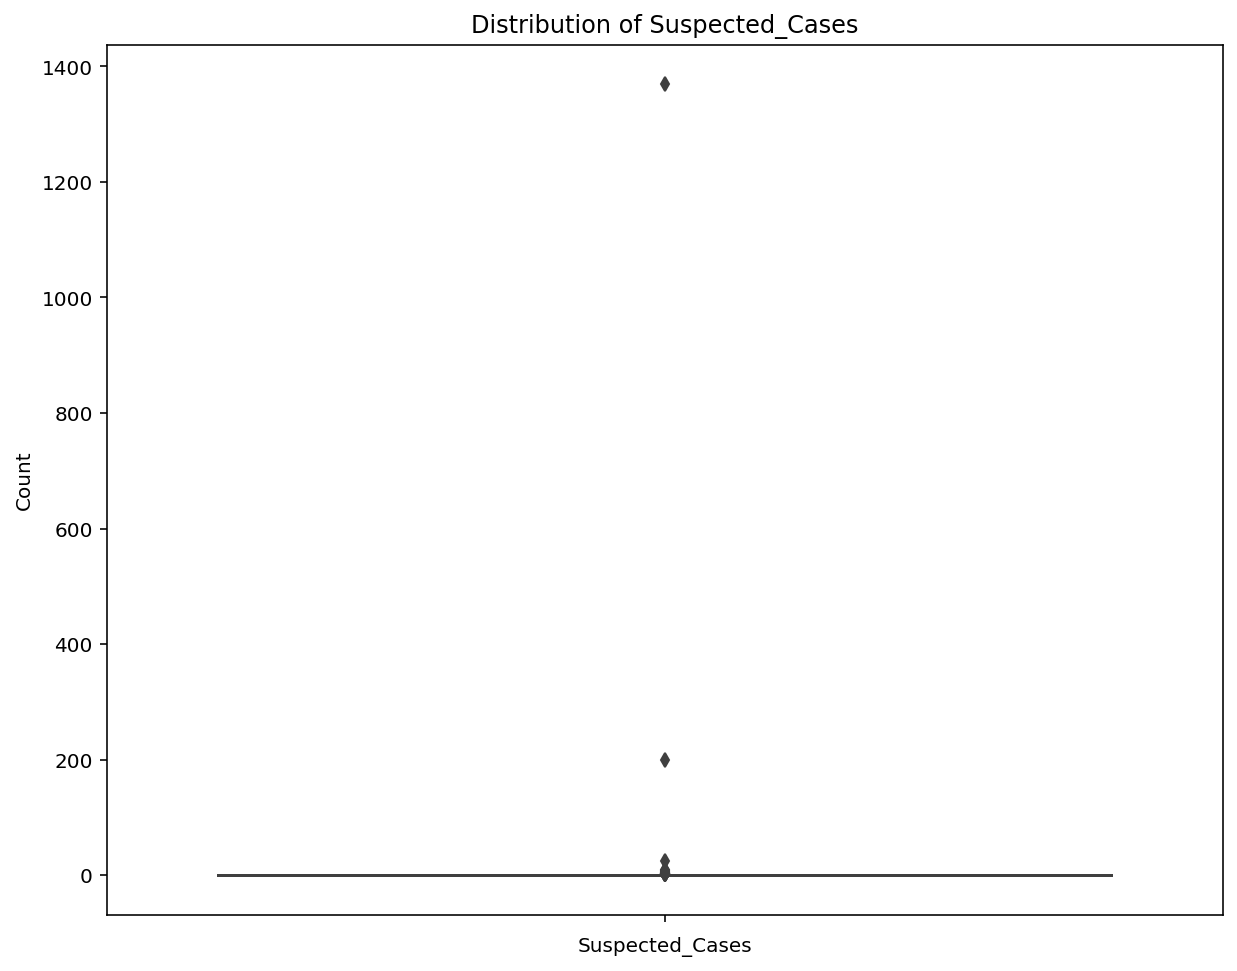

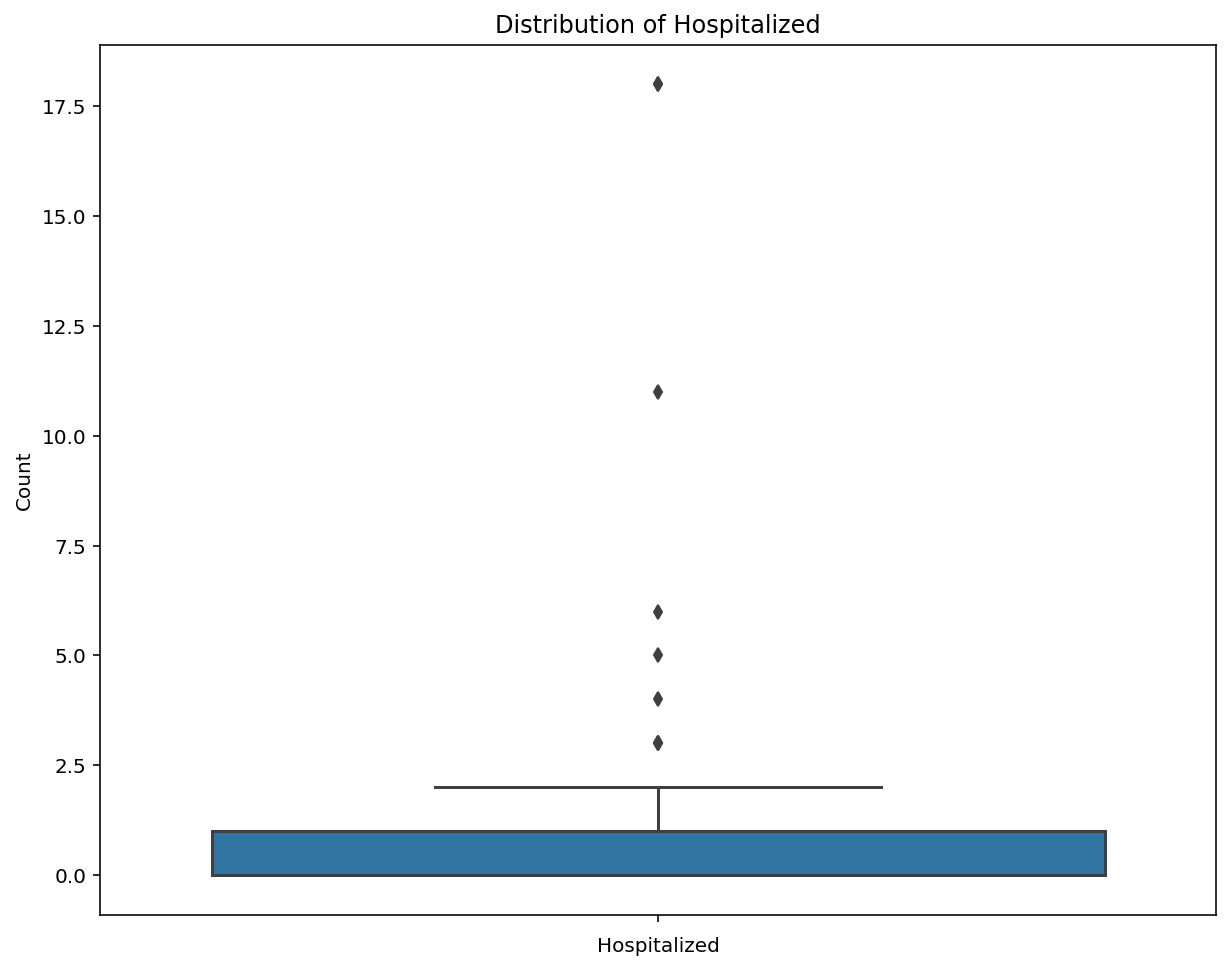

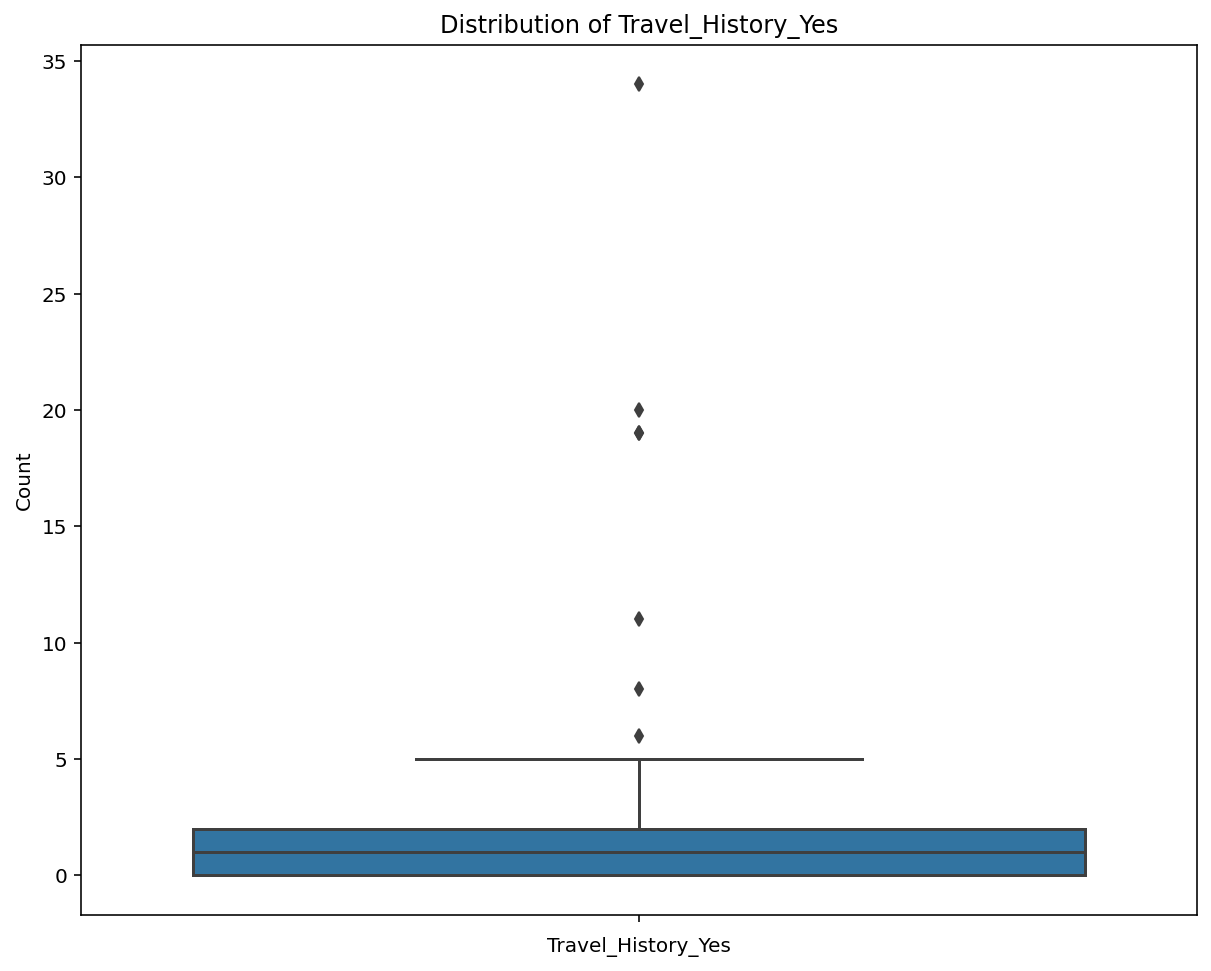

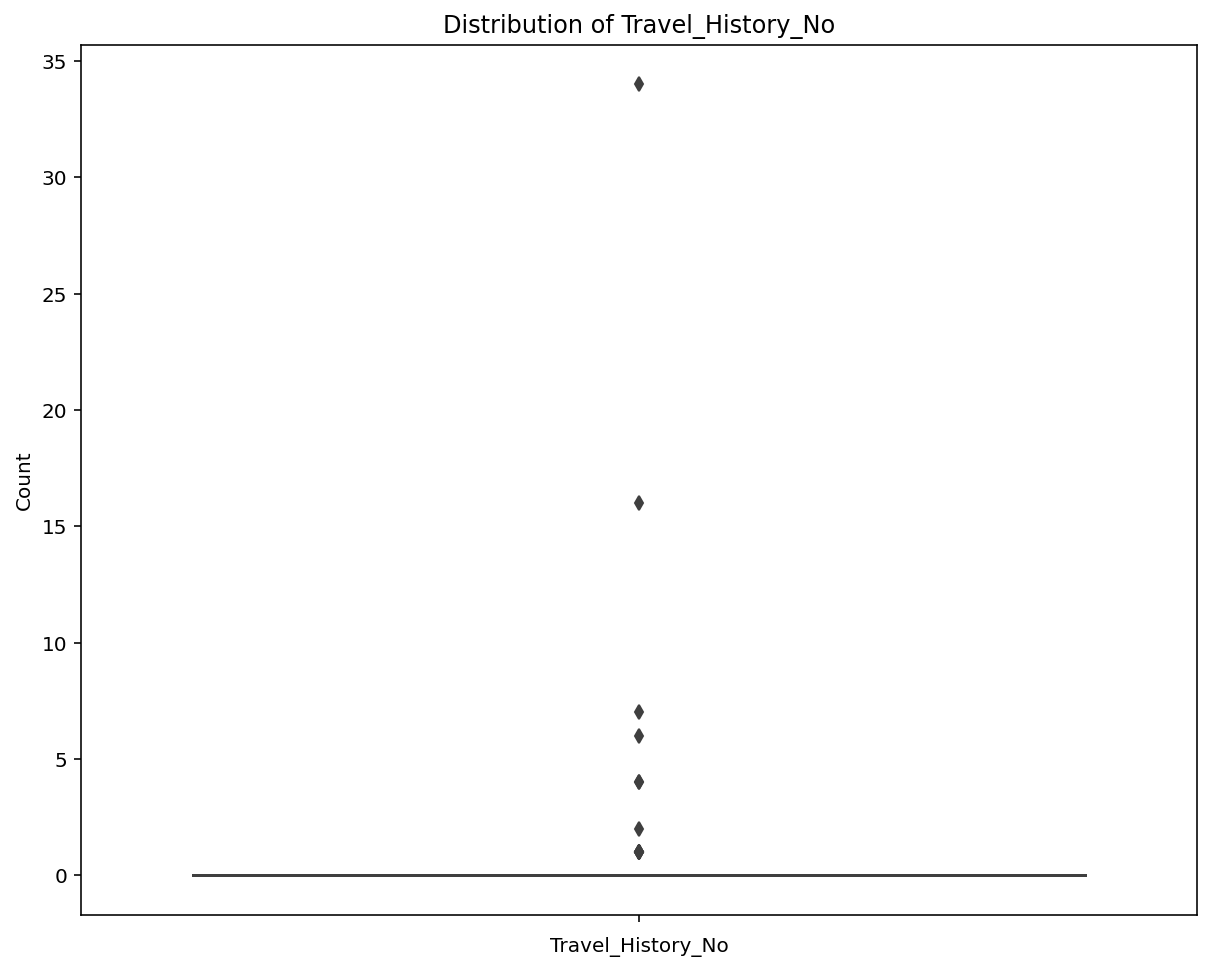

In [23]:
## Using a for loop to create the boxplot of various numerical attributes by calling the "outlier_func" function. 
for i in t:
    outlier_func(i)

In [24]:
## All the numerical attributes in the dataset have outliers. 
## The purpose of observing the outliers are to understand if the attributes have some uncommon and high value information in them.
## In certain situations we might need to remove such outliers depending upon the business needs.
## For this particular analysis we wont be removing the outliers as we need this high end projection as it might depict certain realistic observations.

## Univariate Analysis:-

In [25]:
def univariate_analysis(inp):
    plt.figure(figsize=[10,8])
    sns.displot(x=worldwide_cases[inp])
    plt.title("Distribution of {}".format(inp))
    plt.show()

<Figure size 720x576 with 0 Axes>

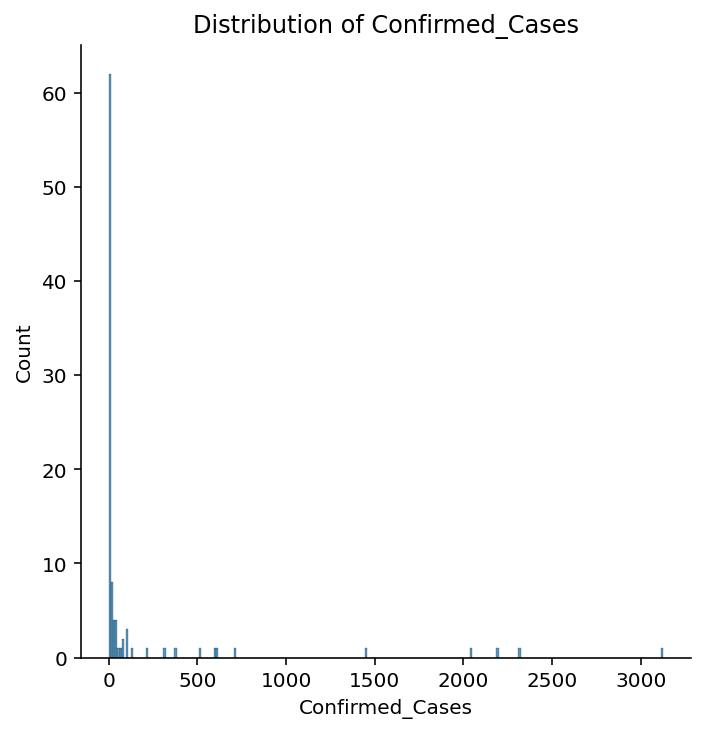

<Figure size 720x576 with 0 Axes>

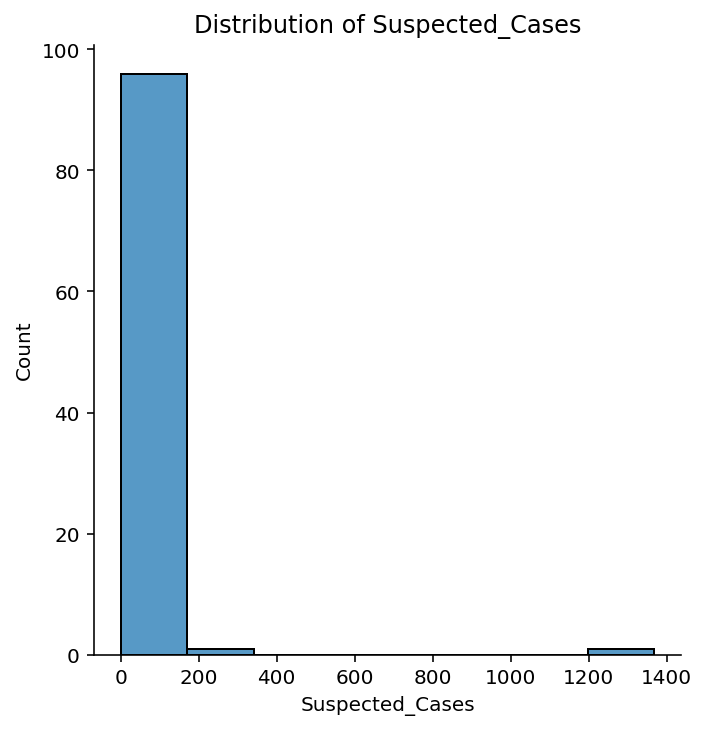

<Figure size 720x576 with 0 Axes>

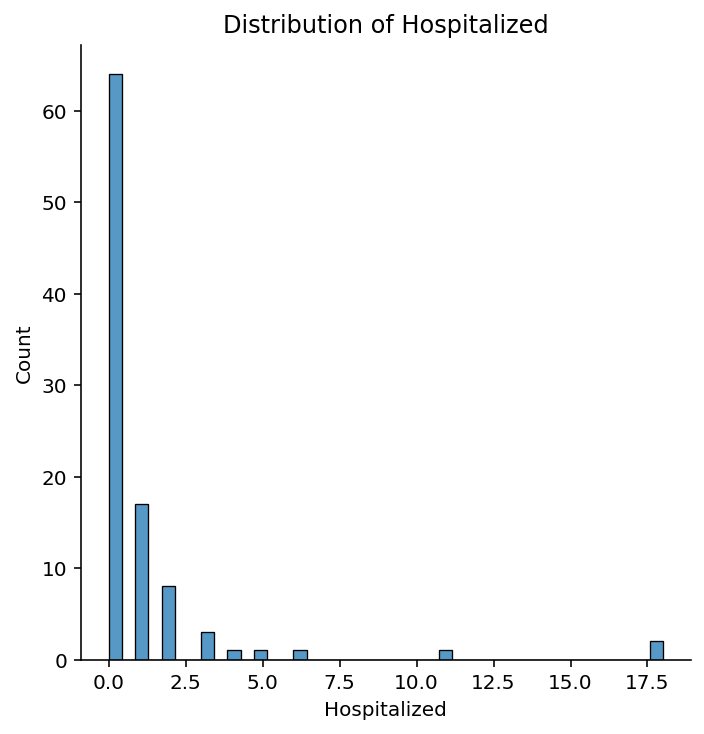

<Figure size 720x576 with 0 Axes>

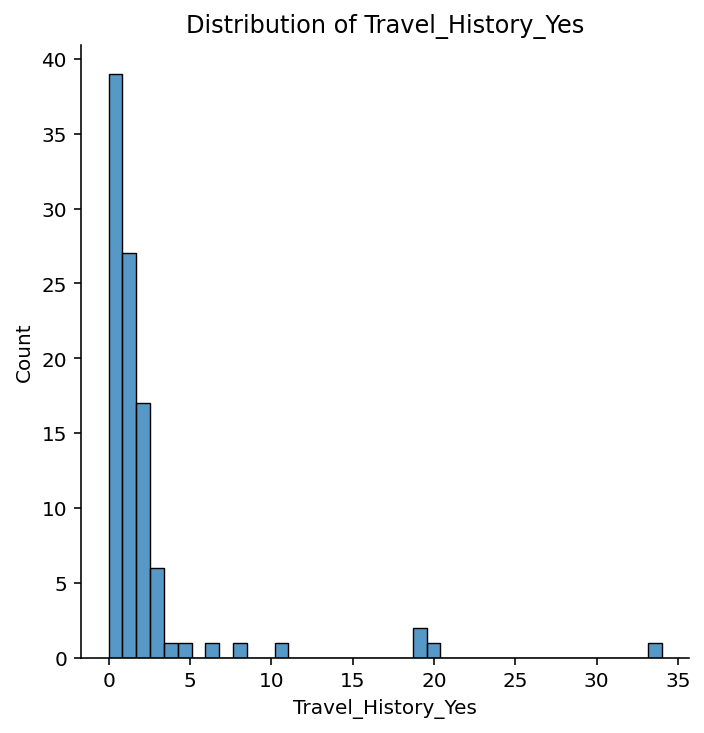

<Figure size 720x576 with 0 Axes>

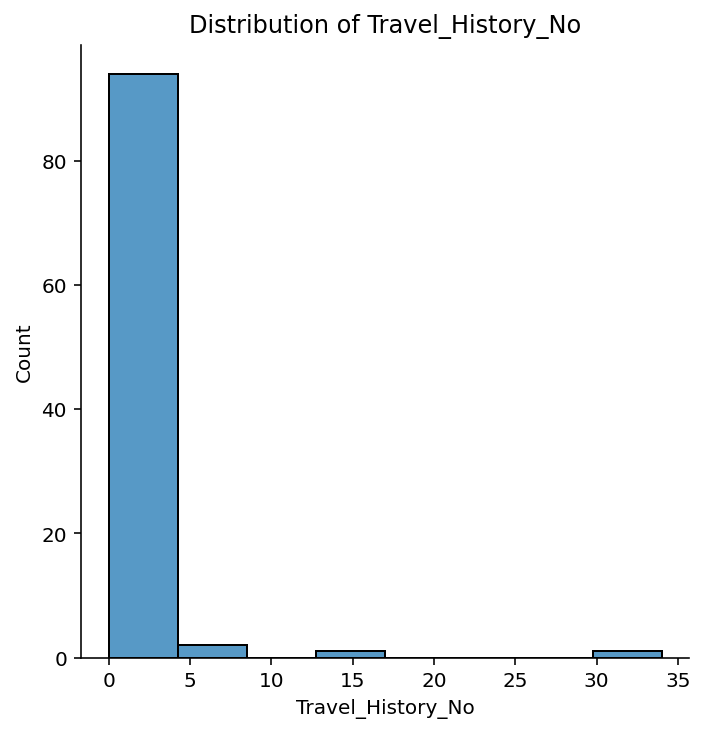

In [26]:
for i in t:
    univariate_analysis(i)

In [27]:
## Inference:-


## Bivariate Analysis:-

In [28]:
## Representig the entire "worldwide_cases" dataframe in the form of a map.
## https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html (for reference)
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country",
                  title=col, hover_data=[col], height=700,width=1000, color_continuous_scale="Viridis")
    fig.show()

In [29]:
plot_map(worldwide_cases, 'Confirmed_Cases')

In [30]:
worldwide_data = worldwide_cases.copy()

In [31]:
## Here we will conver the data in the "Country" attribute which is an obejct type to numerical type so that further analysis could take place.
label_encoder = preprocessing.LabelEncoder()
worldwide_data['Country']= label_encoder.fit_transform(worldwide_data['Country'])

In [32]:
worldwide_data.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,26,2050.0,0.0,5.0,2.0,7.0
1,69,515.0,0.0,0.0,0.0,34.0
2,84,3125.0,0.0,11.0,2.0,0.0
3,93,2316.0,0.0,4.0,34.0,6.0
4,14,604.0,9.0,1.0,2.0,0.0


In [33]:
worldwide_data["Country"].unique()

array([26, 69, 84, 93, 14, 86, 44, 30,  6,  1, 33, 59, 43, 87, 36,  2,  0,
       23, 57, 80, 75, 21, 92, 29, 96, 62, 85,  8, 41, 25, 53, 42, 56, 64,
       31, 89, 67, 10, 52, 38, 63, 66, 19, 35, 55, 37, 94, 47, 15, 46, 90,
        3, 34, 40, 39, 68,  4, 91, 12, 51, 95, 72, 32, 79, 50, 58, 17, 76,
       48, 83, 78, 82, 88, 18, 20, 11, 81, 97, 28,  7, 27, 70, 65, 24, 45,
       60, 73,  9, 74, 54,  5, 61, 22, 16, 71, 13, 49, 77])

In [34]:
worldwide_cases["Country"].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

### Finding out the top 10 affected Countries.

- Finding out the top 10 Countries in each of the feature present in the "worldwide_cases" dataframe and storing them in a different dataframes.

In [35]:
Highest_Confirmed_Cases= worldwide_cases.sort_values(by="Confirmed_Cases", ascending=False).reset_index()[:10]
Highest_Suspected_Cases= worldwide_cases.sort_values(by="Suspected_Cases", ascending=False).reset_index()[:10]
Highest_Hospitalized_Cases= worldwide_cases.sort_values(by="Hospitalized", ascending=False).reset_index()[:10]
Highest_Travel_History_Yes= worldwide_cases.sort_values(by="Travel_History_Yes", ascending=False).reset_index()[:10]
Highest_Travel_History_No= worldwide_cases.sort_values(by="Travel_History_No", ascending=False).reset_index()[:10]

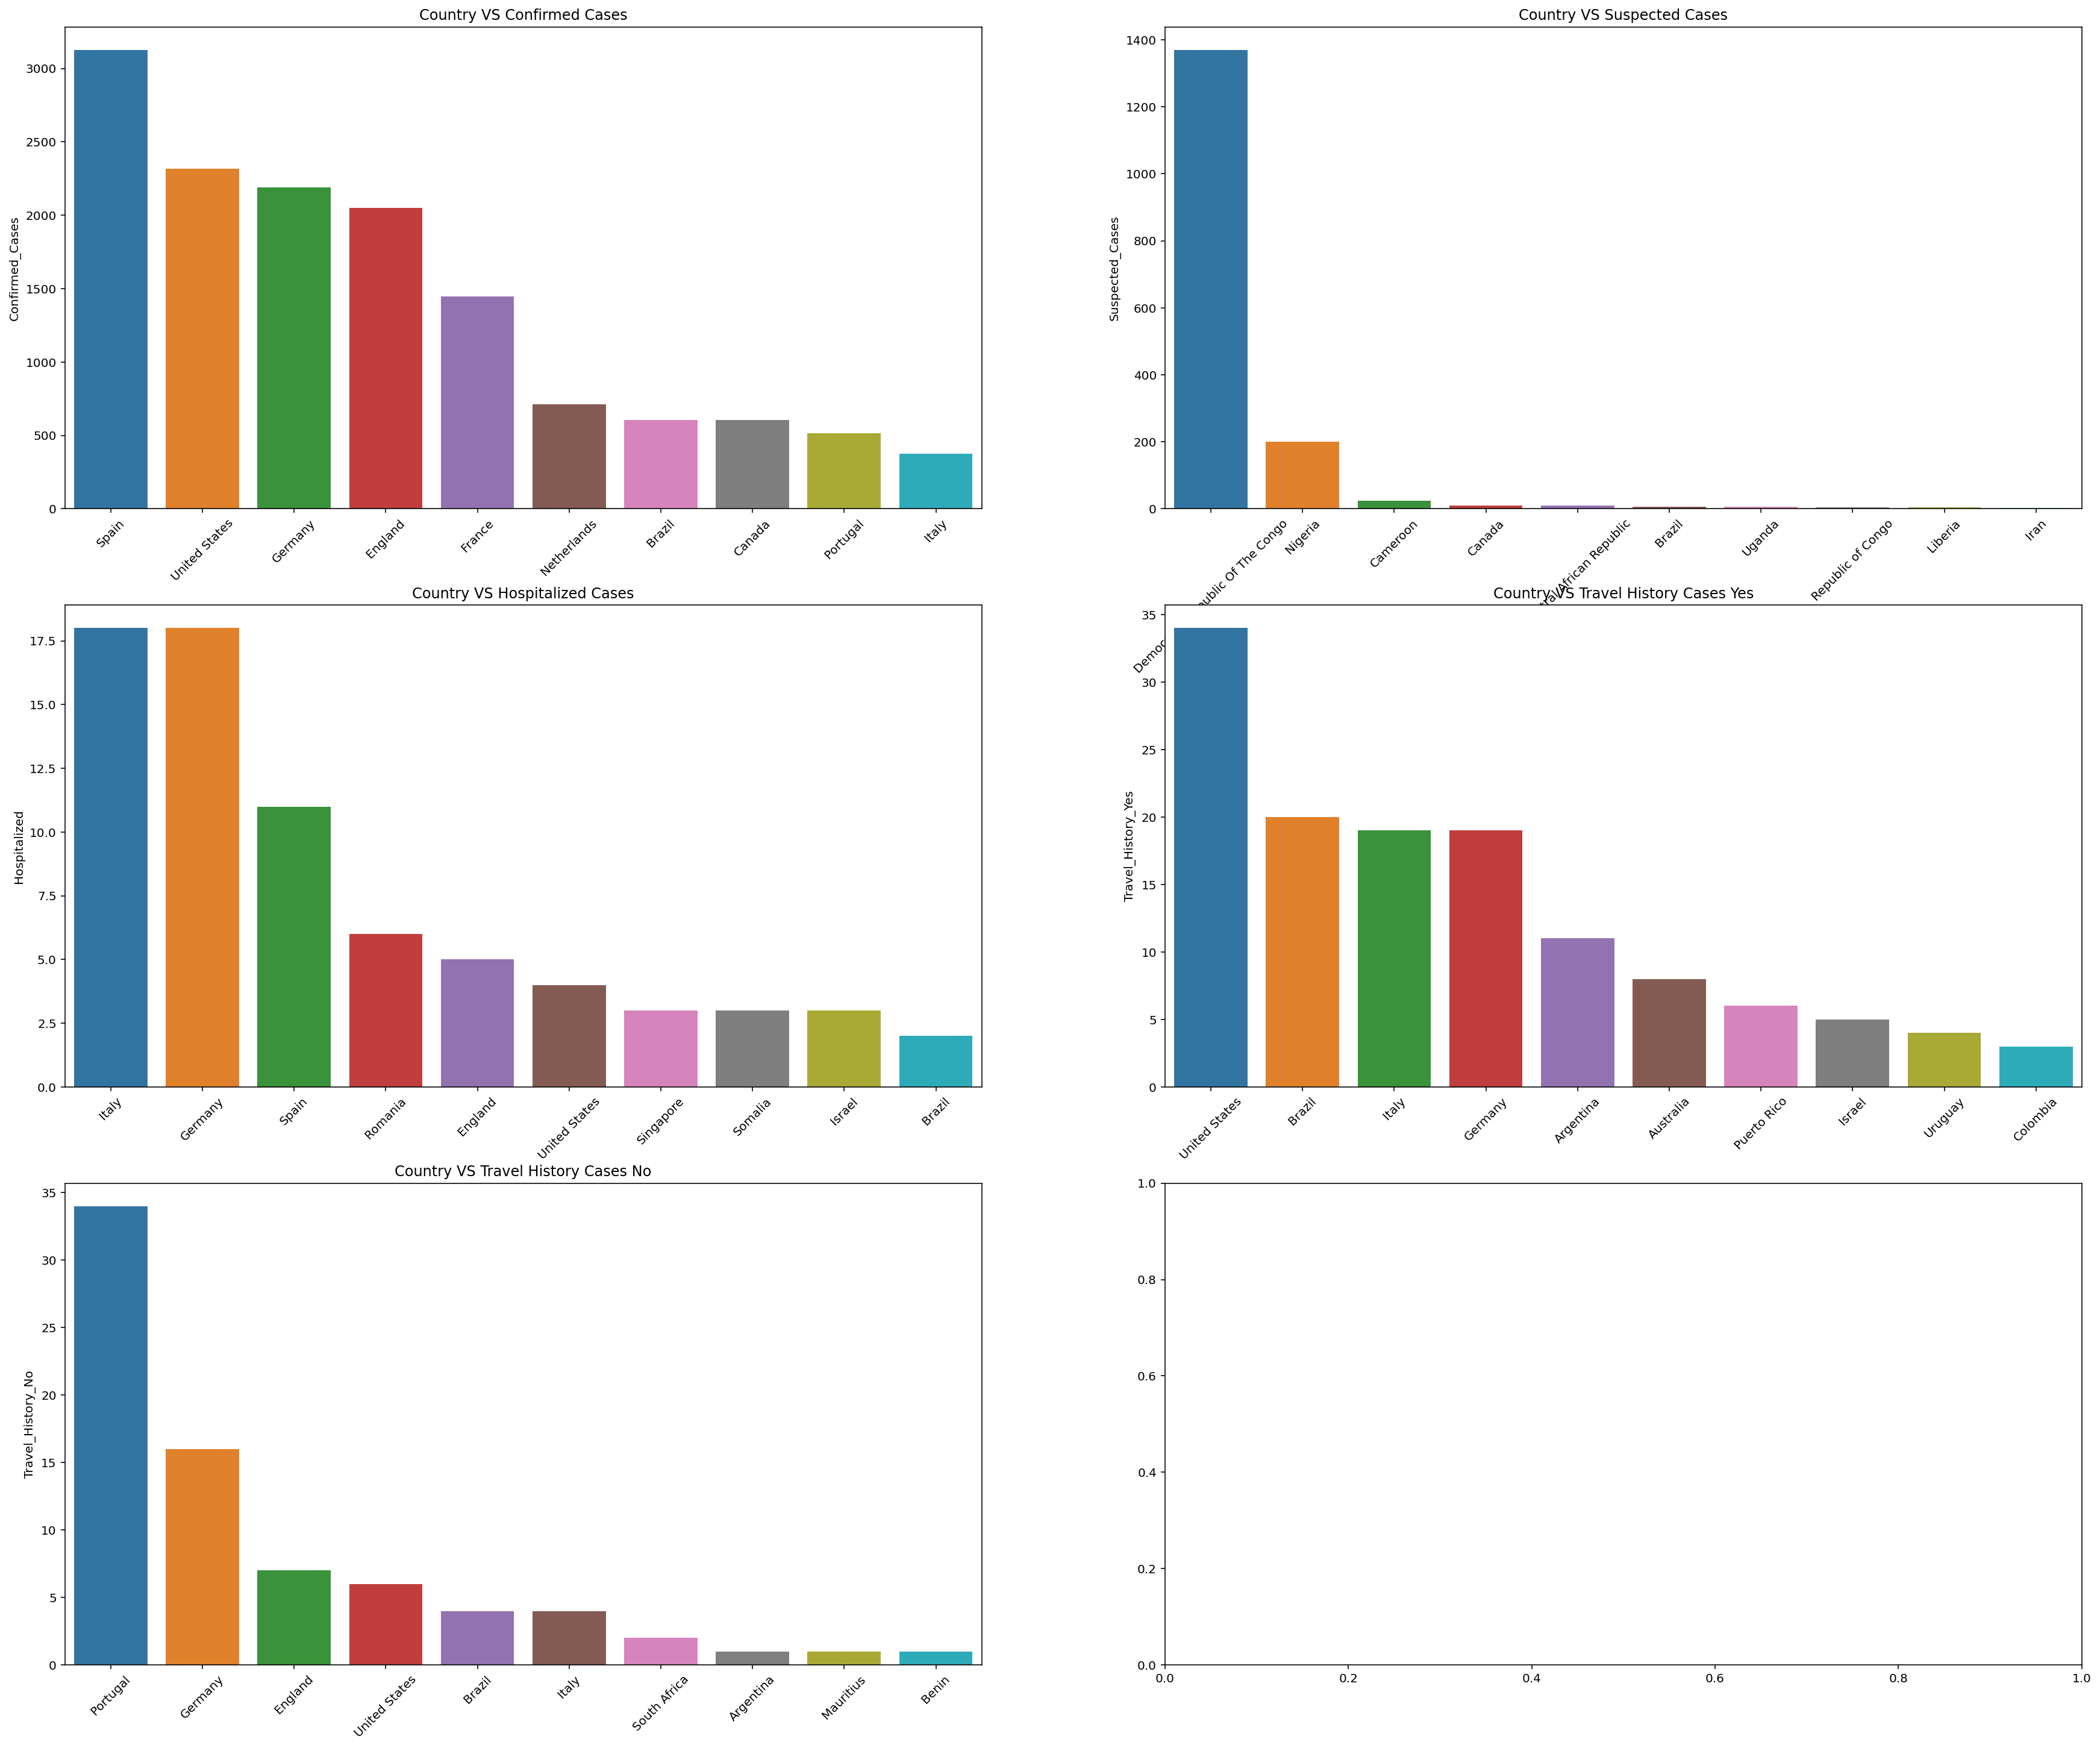

In [36]:
## Creating the 
ax=[]
labels=['Country VS Confirmed Cases','Country VS Suspected Cases','Country VS Hospitalized Cases','Country VS Travel History Cases Yes', 'Country VS Travel History Cases No']
fig,axes = plt.subplots(3,2,figsize=(30,25))
ax.append(sns.barplot(x=Highest_Confirmed_Cases.Country,y=Highest_Confirmed_Cases.Confirmed_Cases,ax=axes[0,0]))
ax.append(sns.barplot(x=Highest_Suspected_Cases.Country,y=Highest_Suspected_Cases.Suspected_Cases,ax=axes[0,1]))
ax.append(sns.barplot(x=Highest_Hospitalized_Cases.Country,y=Highest_Hospitalized_Cases.Hospitalized,ax=axes[1,0]))
ax.append(sns.barplot(x=Highest_Travel_History_Yes.Country,y=Highest_Travel_History_Yes.Travel_History_Yes,ax=axes[1,1]))
ax.append(sns.barplot(x=Highest_Travel_History_No.Country,y=Highest_Travel_History_No.Travel_History_No,ax=axes[2,0]))

for i in range(5):
    for item in ax[i].get_xticklabels():
        item.set_rotation(45)
#       ax[i].bar_label(ax[i].containers[0])
        ax[i].set_title(labels[i])
        ax[i].set(xlabel=None)

# Working on the "detected_cases" dataframe.

In [37]:
## Reviewing the dataframe for better understanding and reference.
detected_cases.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
5,2022-02-28,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-03-04,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-03-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
## Finding out the number of data/information(rows) and attributes/features(columns) available for the particular dataframe.
detected_cases.shape

(1080, 9)

In [39]:
##
detected_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 15860
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        1080 non-null   object
 1   Country                  1080 non-null   object
 2   City                     287 non-null    object
 3   Age                      391 non-null    object
 4   Gender                   426 non-null    object
 5   Symptoms                 70 non-null     object
 6   Hospitalised (Y/N/NA)    127 non-null    object
 7   Isolated (Y/N/NA)        224 non-null    object
 8   Travel_history (Y/N/NA)  212 non-null    object
dtypes: object(9)
memory usage: 84.4+ KB


In [40]:
## Checking the number of null values
detected_cases.isnull().sum()

Date_confirmation             0
Country                       0
City                        793
Age                         689
Gender                      654
Symptoms                   1010
Hospitalised (Y/N/NA)       953
Isolated (Y/N/NA)           856
Travel_history (Y/N/NA)     868
dtype: int64

On observing the attributes/features, we can determine that the "City" and "Date_confirmation" columns are of not much use as they either very high number of null values or they dont have much use in the analysis. Hence, we can remove them.

We can also replace the "NaN" values with "none" for better perspective.

In [41]:
## Dropping the attributes "City" and "Date_confirmation" from the dataframe.
detected_cases.drop(['City','Date_confirmation'], axis=1,inplace = True)

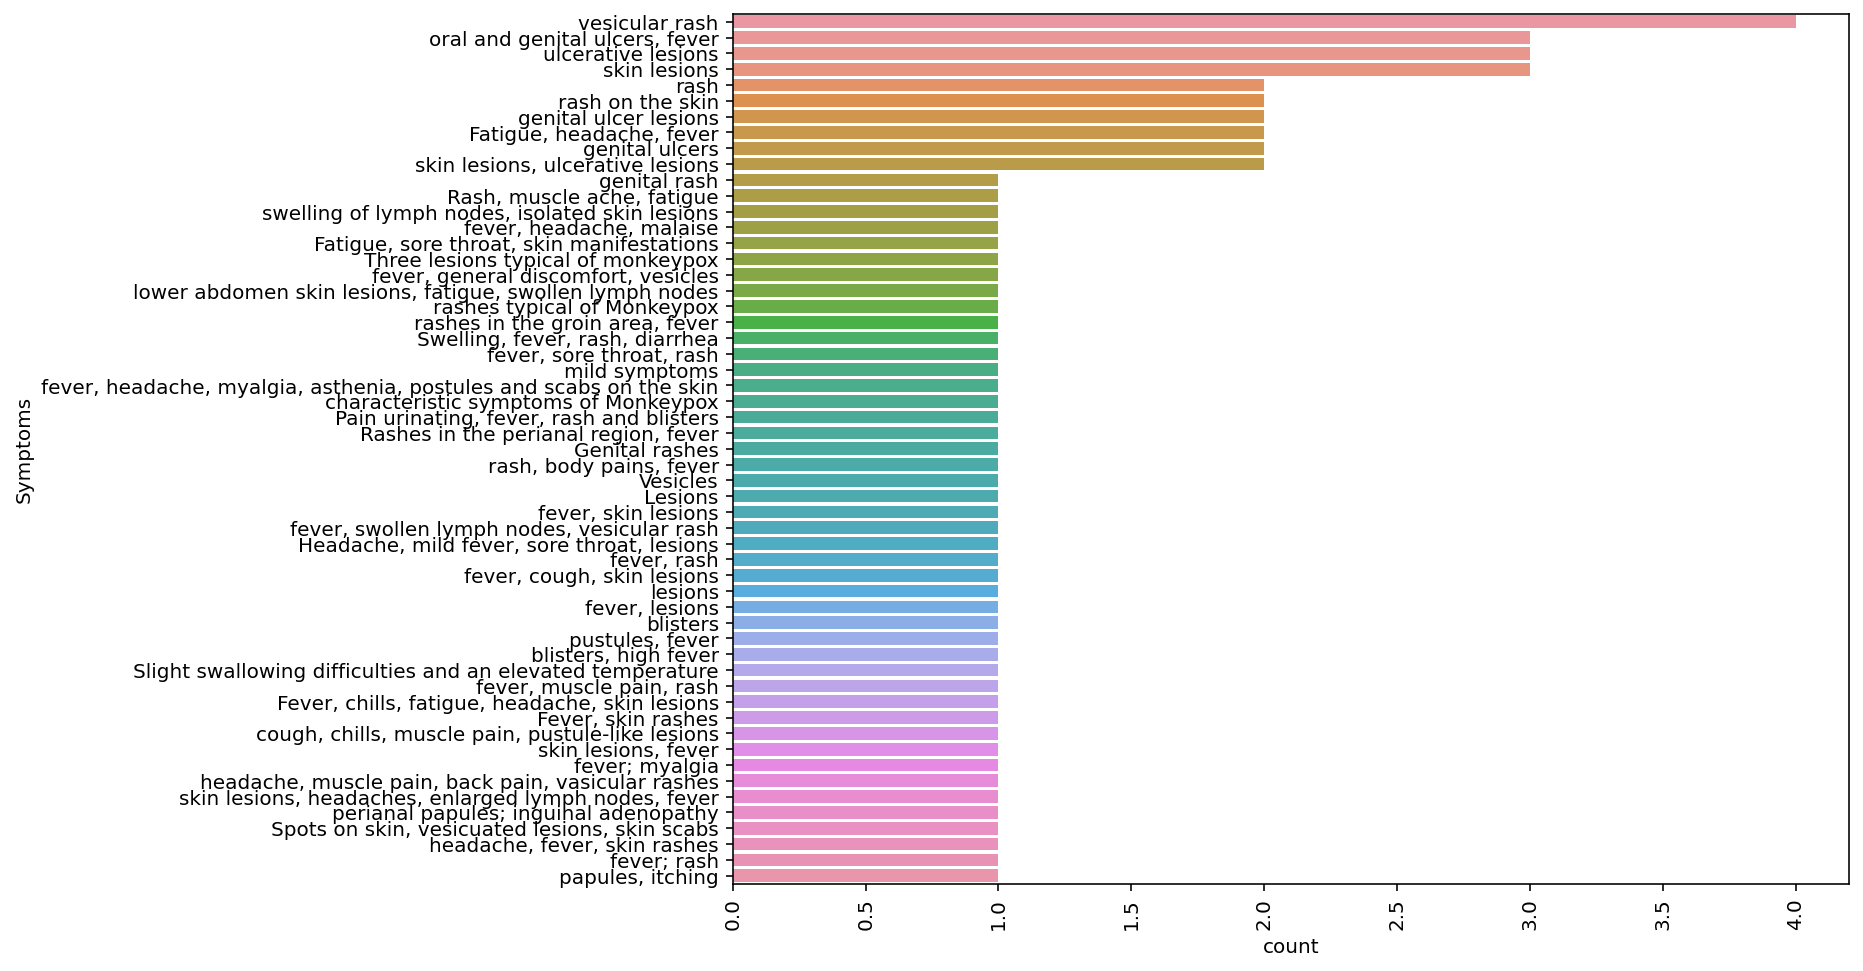

In [42]:
## The distribution of Symptoms is plotted before as if we replace the 'NaN' values or blank values later with 'NA' then its count will be highest in comparision to all other categories.
## Distribution of Symptoms using countplot.
plt.figure(figsize=(10,8))
sns.countplot(y='Symptoms', data=detected_cases, order  = detected_cases['Symptoms'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [43]:
for i in detected_cases.columns: 
    detected_cases[i] = detected_cases[i].fillna('NA') 

In [44]:
## Checking the dataset post removal of the above mentioned attributes.
detected_cases.head()

,Country,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,Nigeria,NA,NA,NA,NA,NA,NA
2,Cameroon,0-39,NA,NA,NA,NA,NA
5,Nigeria,NA,NA,NA,NA,NA,NA
6,Central African Republic,NA,NA,NA,NA,NA,NA
8,Nigeria,NA,NA,NA,NA,NA,NA


In [45]:
## Here we will check the unqiue list of values present in each of the attribute.

In [46]:
detected_cases["Age"].unique()

array(['NA', '0-39', '20-44', '30-34', '25-29', '20-69', '20-64', '40-44',
       '20-59', '40-49', '30-39', '50-59', '15-74', '30-59', '35-39',
       '45-49', '55-59', '15-39', '30-50', '50-54', '20-24', '15-64',
       '25-49', '22-55', '40-45', '26-54', '30-54', '30-49', '20-29',
       '15-69', '40-42', '35-40', '45-50', '50-55', '20-50', '34-46',
       '20-62', '55-64', '45-54', '35-44', '25-34', '20-39', '60-64',
       '5-9', '36-50', '20-60', '19-24', '65-69', '20-49', '23-46',
       '25-39', '25-53', '15-84', '51-65', '20-35', '20-54', '1-69',
       '30-35', '15-19', '20-65'], dtype=object)

In [47]:
detected_cases["Gender"].unique()

array(['NA', 'male', 'female', 'male ', 'female ', 'Male'], dtype=object)

In [48]:
detected_cases["Symptoms"].unique()

array(['NA', 'rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', 'perianal papules; inguinal adenopathy',
       'Slight swallowing difficulties and an elevated temperature',
       'genital ulcers', 'lesions', 'genital rash', 'fever, rash',
       'fever, cough, skin lesions', 'oral and genital ulcers, fever',
       'fever, lesions', 'skin lesions', 'blisters', 'pustules, fever',
       'blisters, high fever', 'genital ulcer lesions',
       'fever, muscle pain, rash',
       'Fever, chills, fatigue, headache, skin lesions',
       'Fever, skin rashes',
       'cough, chills, muscle pain, pustule-like lesions',
       'skin lesions, fever', 'fever; myalgia',
       'headache, muscle pain, back pain, vasicular rashes',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'rash on the skin', 'papules, itching',
       'Spots on skin, vesicuated lesions, skin scabs',
       'headache, fever, skin rashes', 'fever; rash',
       'fev

In [49]:
detected_cases["Hospitalised (Y/N/NA)"].unique()

array(['NA', 'Y', 'N'], dtype=object)

In [50]:
detected_cases["Isolated (Y/N/NA)"].unique()

array(['NA', 'Y'], dtype=object)

In [51]:
detected_cases["Travel_history (Y/N/NA)"].unique()

array(['NA', 'Y', 'N'], dtype=object)

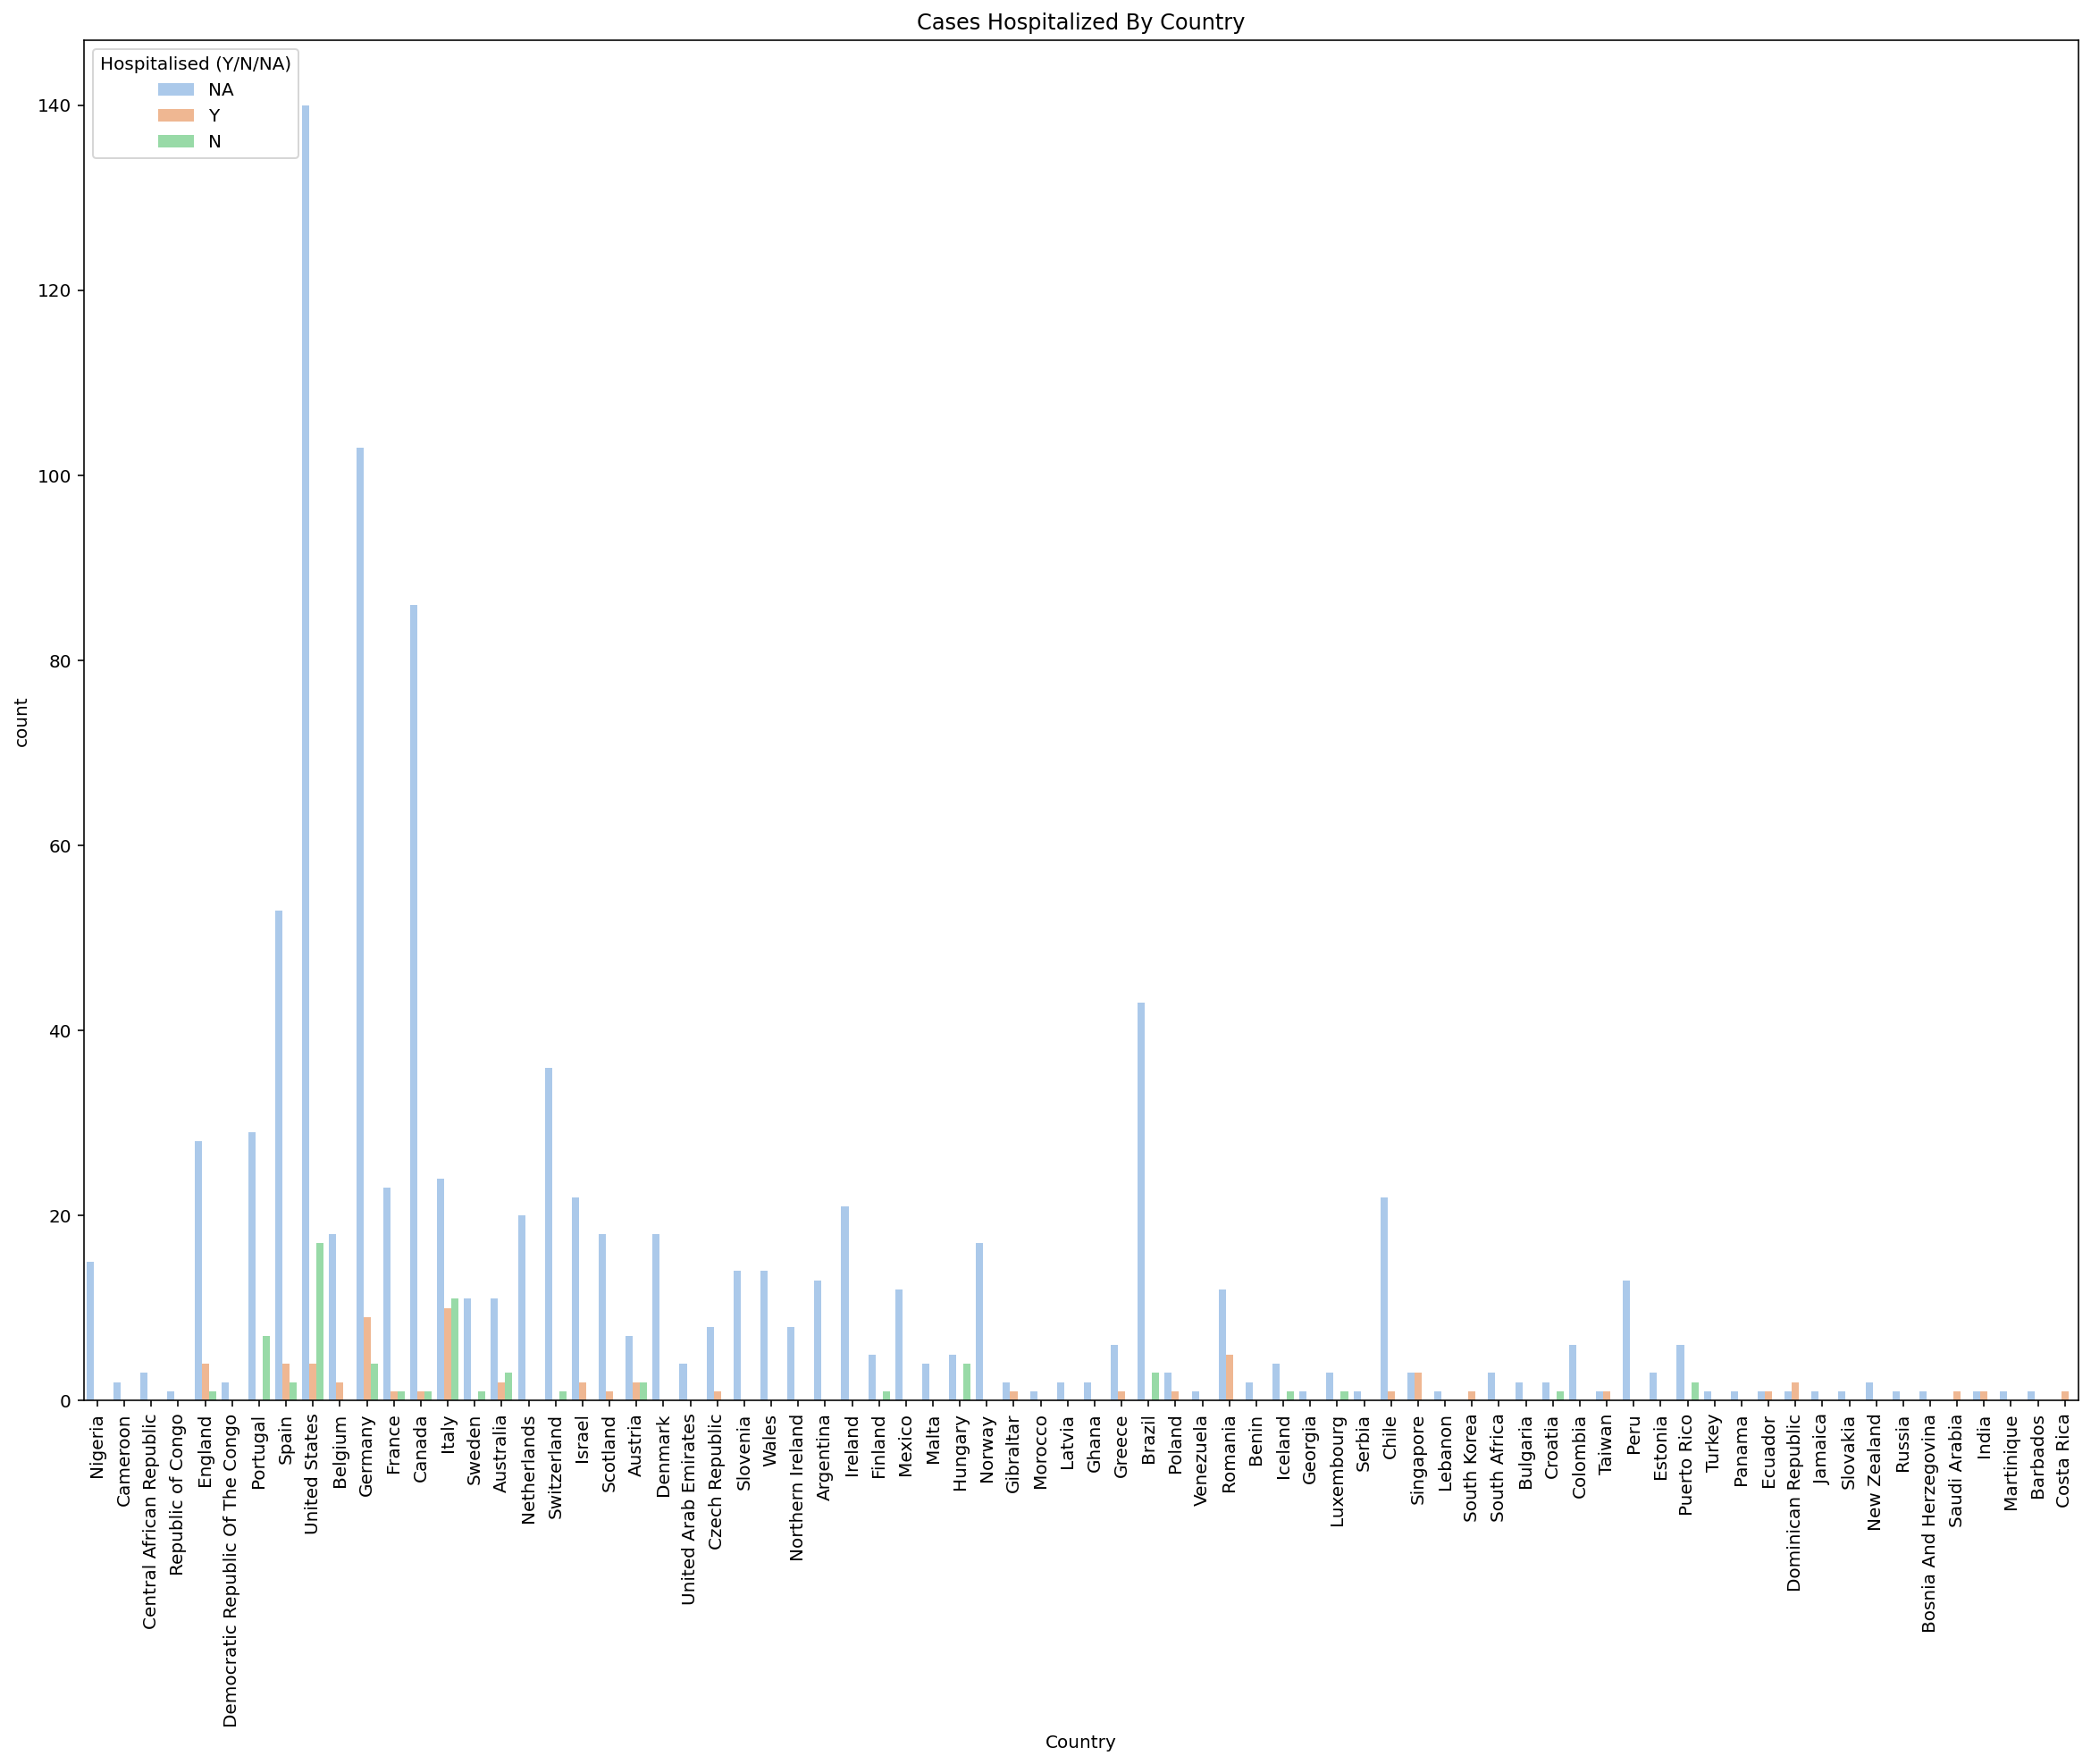

In [52]:
## Checking the distribution of Country w.r.t the "Hospitalized (Y/N/NA)":-
plt.figure(figsize = (20,14))
sns.countplot(x="Country", data=detected_cases, hue = "Hospitalised (Y/N/NA)",palette="pastel")
plt.xticks(rotation = 90)
plt.title("Cases Hospitalized By Country")
plt.show()

### In terms of Visualization and Preprocessing:-

- Nothing much can be feteched out of the "detected_cases" dataframe in terms of Visualization, as the count of 'NA' is the highest in all the attributes making the derivation of useful and relevant information inefficient.

In [53]:
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 694


In [54]:
## Checking the duplicates.
detected_cases.drop_duplicates(subset=None, keep='first', inplace=True)

In [55]:
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 0


In [56]:
detected_cases.head()

,Country,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,Nigeria,NA,NA,NA,NA,NA,NA
2,Cameroon,0-39,NA,NA,NA,NA,NA
6,Central African Republic,NA,NA,NA,NA,NA,NA
18,Republic of Congo,NA,NA,NA,NA,NA,NA
25,England,NA,NA,rash,Y,Y,Y


In [57]:
monkey_pox_symptoms=[]
for i in detected_cases['Symptoms'].values:
    if i not in monkey_pox_symptoms:
        monkey_pox_symptoms.append(i)

In [58]:
#separating all the symptoms containing more than 1 symptom
def filter_it(monkey_pox_symptoms):
    filtered_symp=[]
    for i in monkey_pox_symptoms:
        if ',' in i:
            x = i.split(',')
            for j in x:
                filtered_symp.append(j)
        if ' and' in i:                       
            x = i.split('and')
            for j in x:
                filtered_symp.append(j)
        if ';' in i:                       
            x = i.split('; ')
            for j in x:
                filtered_symp.append(j) 
        if (',' not in i) and ('and' not in i) and (';' not in i):
            filtered_symp.append(i)
    return filtered_symp

filtered_symp = filter_it(monkey_pox_symptoms)
filtered_symp_statement=''
for i in filtered_symp:
    filtered_symp_statement+=i


In [59]:
from wordcloud import WordCloud, STOPWORDS

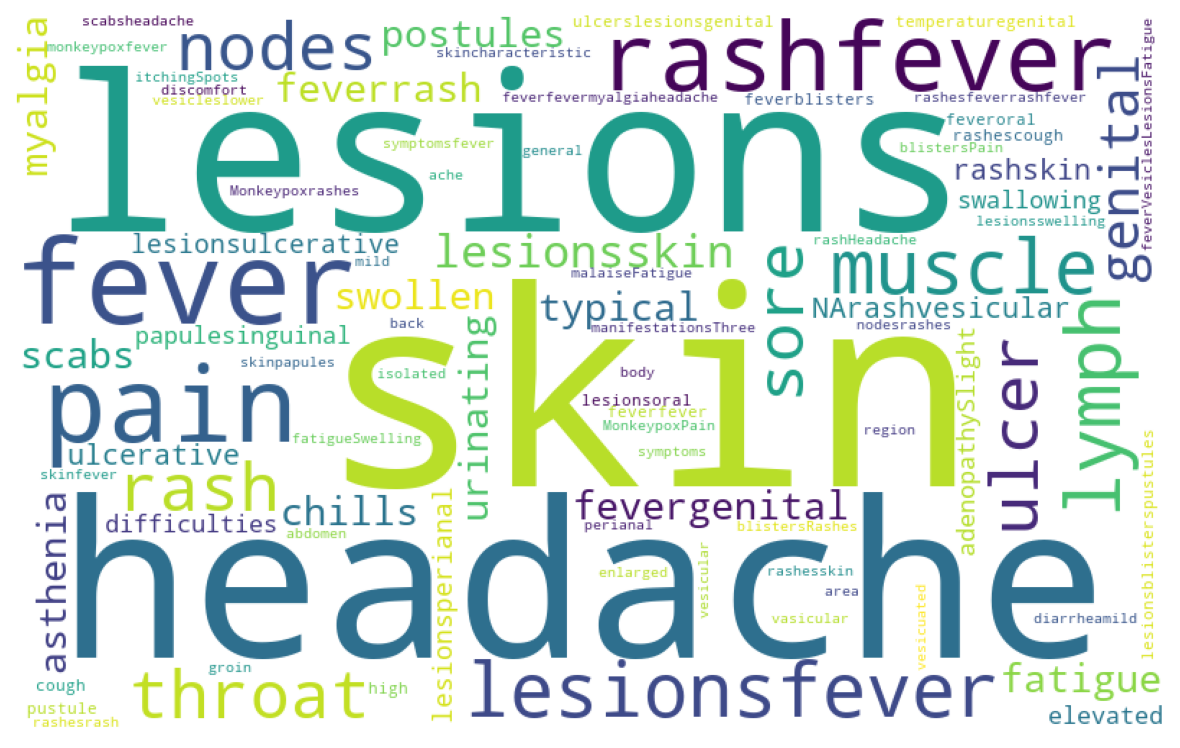

In [60]:
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(filtered_symp_statement)

plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [61]:
## Here we will filter the above mentioned Symptoms further to understand the root cause better.

In [62]:
for i in range(len(filtered_symp)): # Removing the whitespaces in front and end of words.
    filtered_symp[i]=filtered_symp[i].strip()
filtered_symp_res=[]
for i in filtered_symp: # filtering more in detail
    if i not in filtered_symp_res:
        filtered_symp_res.append(i)

In [63]:
for i in range(len(filtered_symp_res)):  # filling the white space with _
    filtered_symp_res[i]=filtered_symp_res[i].replace(" ", "_")
filtered_symp_res

filtered_symp_res_statement=''
for i in filtered_symp_res:
    filtered_symp_res_statement= filtered_symp_res_statement+" "+ i

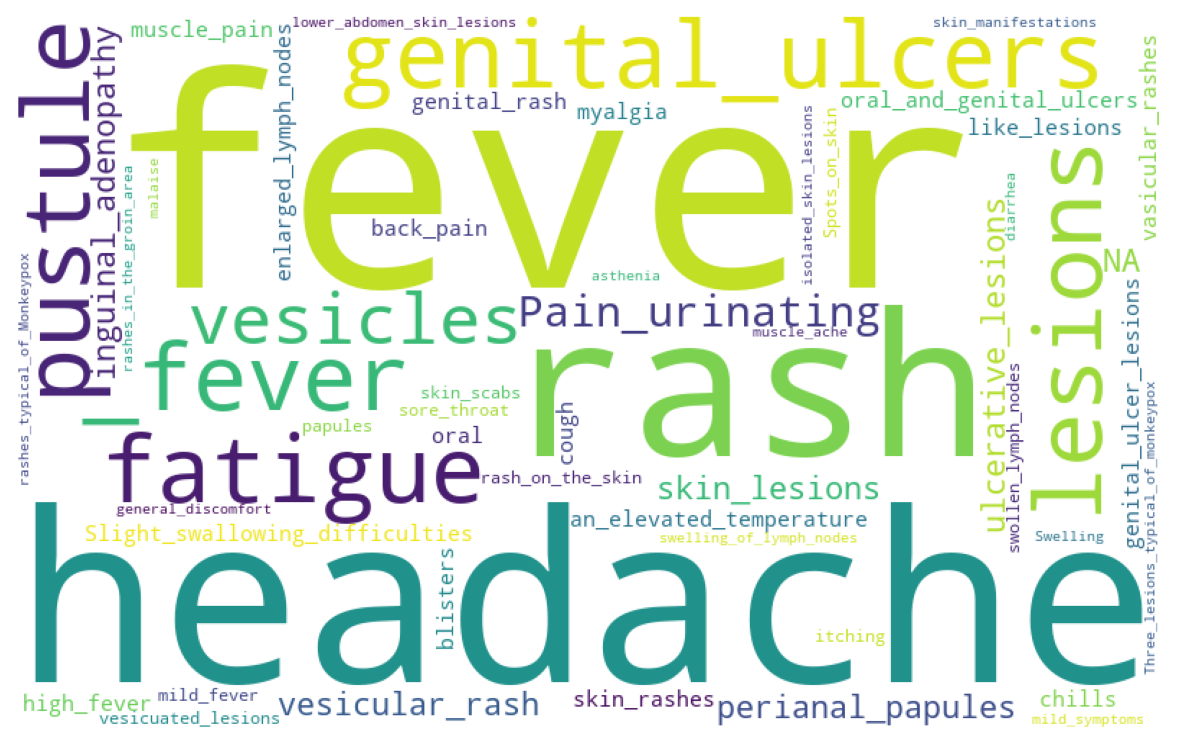

In [64]:
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(filtered_symp_res_statement)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### List of Symptoms which require earliest checkup in Hospital are as follows:-

In [65]:
symptoms_hospital = detected_cases[detected_cases['Hospitalised (Y/N/NA)']=='Y']['Symptoms']
symptoms_hospital

25                                                    rash
36                                                    rash
38                                          vesicular rash
39                                          vesicular rash
45                                                      NA
57                                                      NA
66                   perianal papules; inguinal adenopathy
67       Slight swallowing difficulties and an elevated...
71                                                      NA
76                                                 lesions
89                                            genital rash
109                                                     NA
135                                                     NA
162                             fever, cough, skin lesions
191                                                     NA
214                                         fever, lesions
217                                           skin lesio

In [66]:
#### Inference:-


In [67]:
after_filter=filter_it(symptoms_hospital)

for i in range(len(after_filter)): # Removing the whitespaces in front and end of words.
    after_filter[i]=after_filter[i].strip()
after_filter_plot = []
for i in after_filter:
    if i!='NA':
        after_filter_plot.append(i)

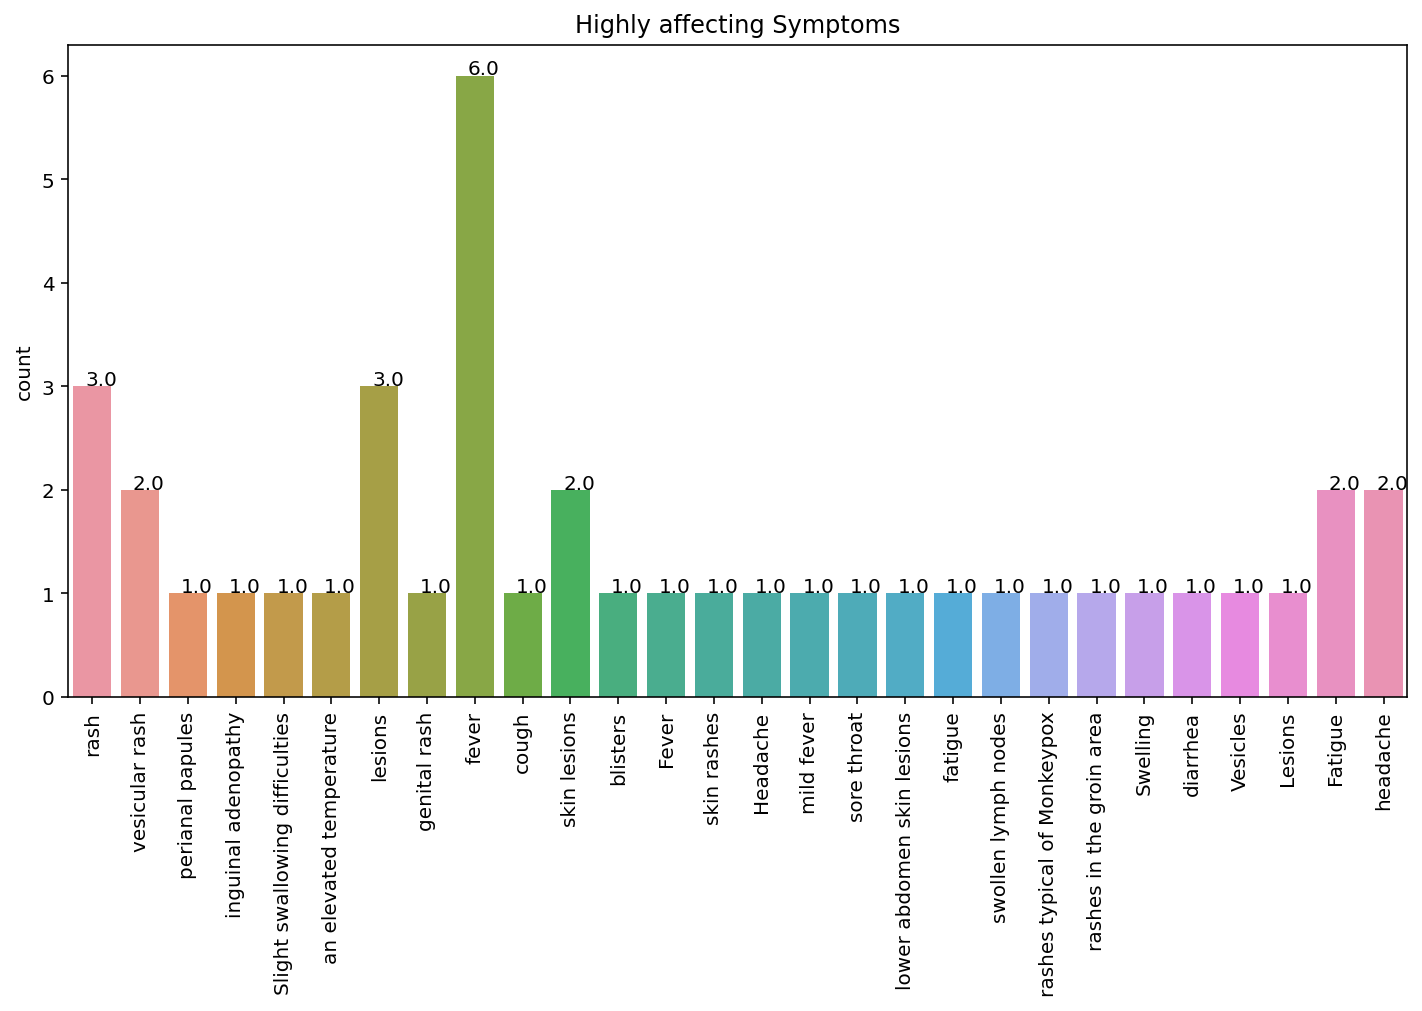

In [68]:
fig,axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(x=after_filter_plot)
ax.set_title('Highly affecting Symptoms')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for item in ax.get_xticklabels():
        item.set_rotation(90)

### We will know validate the total count of population in terms of Male and Female who are affected by Monkey Pox.

In [69]:
## Checking the values Gender.
detected_cases['Gender'].unique()

array(['NA', 'male', 'female', 'male ', 'female ', 'Male'], dtype=object)

In [70]:
detected_cases['Gender'].replace('female ','female')

0            NA
2            NA
6            NA
18           NA
25           NA
          ...  
15198      male
15506      male
15507    female
15762      male
15813      male
Name: Gender, Length: 386, dtype: object

In [71]:
detected_cases['Gender'].unique()

array(['NA', 'male', 'female', 'male ', 'female ', 'Male'], dtype=object)

In [72]:
## Replacing the Gender data with space to data without space at the end. 
## The reason for replacing them is that the model identifies 'male ' and 'male' differently becuase of a space at the end of the information.
for i in detected_cases.columns: 
    detected_cases[i] = detected_cases[i].replace('male ', 'male') 
    detected_cases[i] = detected_cases[i].replace('Male', 'male') 
    detected_cases[i] = detected_cases[i].replace('Female', 'female')
    detected_cases[i] = detected_cases[i].replace('female ', 'female') 

In [73]:
detected_cases['Gender'].unique()

array(['NA', 'male', 'female'], dtype=object)

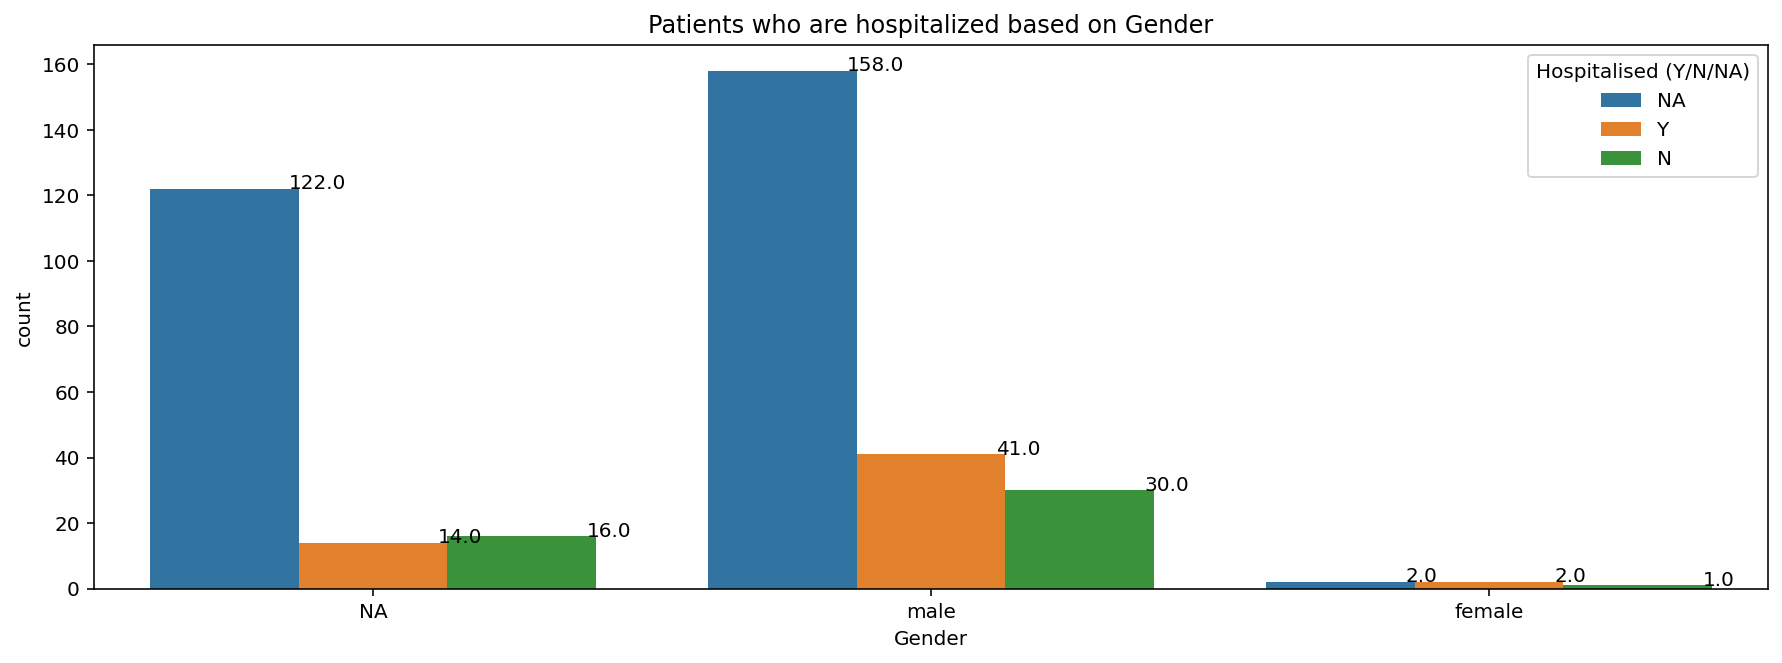

In [74]:
fig,axes = plt.subplots(figsize=(15,5))

ax = sns.countplot(x=detected_cases['Gender'],hue=detected_cases['Hospitalised (Y/N/NA)'])
ax.set_title('Patients who are hospitalized based on Gender')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

### Now we will analyze what is the count of Hospitalized patients with travel history.

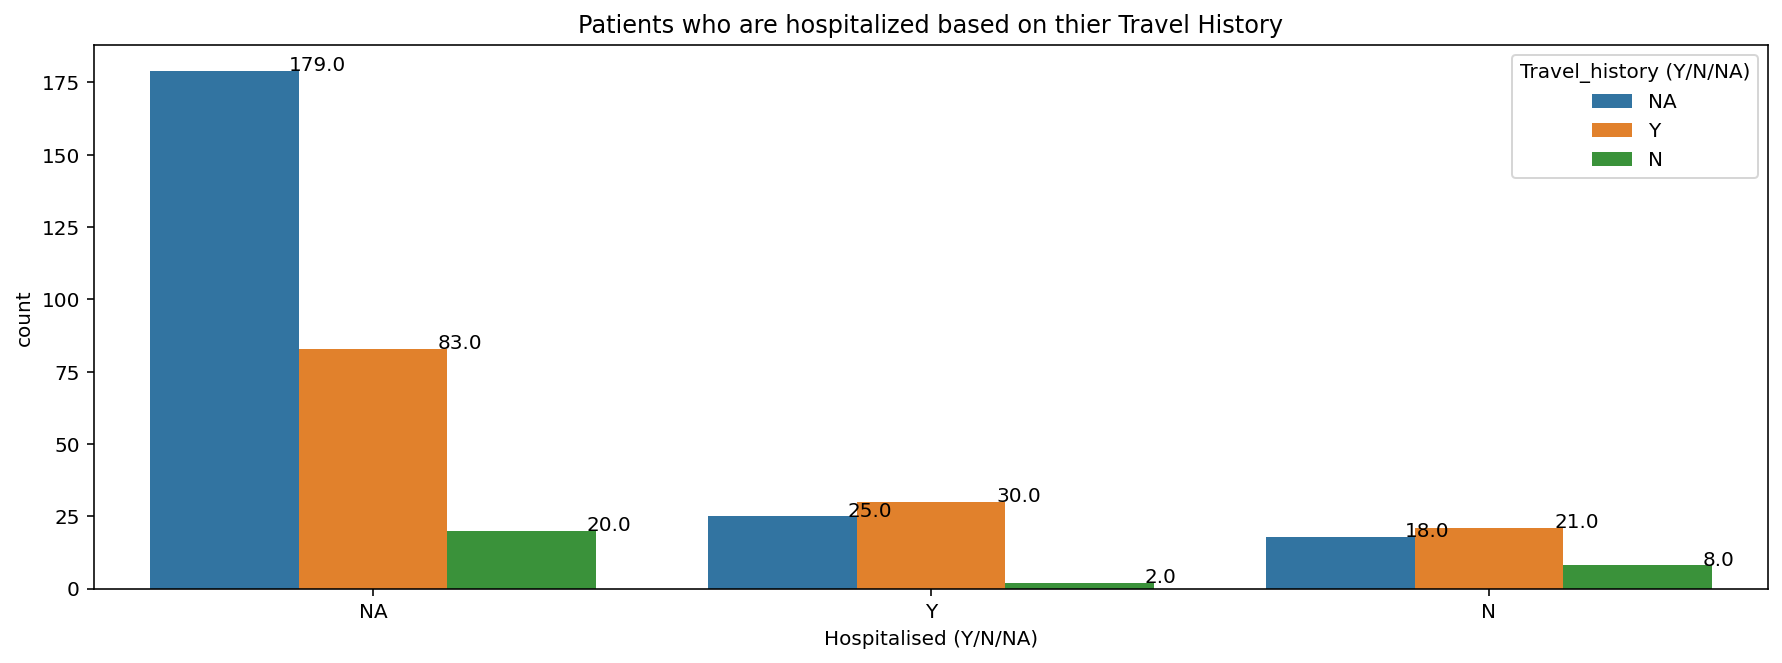

In [75]:
fig,axes = plt.subplots(figsize=(15,5))
ax = sns.countplot(x=detected_cases['Hospitalised (Y/N/NA)'],hue=detected_cases['Travel_history (Y/N/NA)'])
ax.set_title('Patients who are hospitalized based on thier Travel History')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Working on the "confirmed_daily_cases" dataframe.

In [76]:
## reading the dataframe confirmed_daily_cases" to analize and understand the data.
confirmed_daily_cases.head(10)

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-1-31
0,Nigeria,2,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,1
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,118,0,0,0,272,0,0,0
5,Democratic Republic Of The Congo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Portugal,0,0,0,0,0,0,0,0,0,...,42,0,0,0,0,0,0,0,0,0
7,Spain,0,0,0,0,0,0,0,0,0,...,0,0,388,0,0,0,290,0,0,0
8,United States,0,0,0,0,0,0,0,0,0,...,123,184,358,0,0,153,121,255,0,0
9,Belgium,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,87,0,0,0,0


In [77]:
## Checking the number of rows and columns.
confirmed_daily_cases.shape

(74, 80)

In [78]:
## Checking the datatype of the attributes in the "confirmed_daily_cases" dataframe.
confirmed_daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     74 non-null     object
 1   2022-01-31  74 non-null     int64 
 2   2022-02-17  74 non-null     int64 
 3   2022-02-28  74 non-null     int64 
 4   2022-03-04  74 non-null     int64 
 5   2022-03-31  74 non-null     int64 
 6   2022-04-10  74 non-null     int64 
 7   2022-04-12  74 non-null     int64 
 8   2022-04-30  74 non-null     int64 
 9   2022-05-06  74 non-null     int64 
 10  2022-05-08  74 non-null     int64 
 11  2022-05-12  74 non-null     int64 
 12  2022-05-13  74 non-null     int64 
 13  2022-05-15  74 non-null     int64 
 14  2022-05-17  74 non-null     int64 
 15  2022-05-18  74 non-null     int64 
 16  2022-05-19  74 non-null     int64 
 17  2022-05-20  74 non-null     int64 
 18  2022-05-21  74 non-null     int64 
 19  2022-05-23  74 non-null     int64 
 20  2022-05-24  

### Time Series Analysis.

In [79]:
#confirmed_daily_cases.head(16).T

In [80]:
confirmed_daily_cases.set_index('Country',inplace=True)
confirmed_daily_cases.head()

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-1-31
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,2,0,1,0,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
Cameroon,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Central African Republic,0,0,0,2,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Republic of Congo,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
England,0,0,0,0,0,0,0,0,1,0,...,0,0,118,0,0,0,272,0,0,0


In [81]:
confirm_data = confirmed_daily_cases.T
confirm_data.head()

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Jamaica,Slovakia,New Zealand,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Costa Rica
2022-01-31,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
## Now we will take the sum of all the number of classes worldwide to a single columns with respect to the date.

In [83]:
confirm_data['Total Cases']=confirm_data.sum(axis=1)
confirm_data 

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Slovakia,New Zealand,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Costa Rica,Total Cases
2022-01-31,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,0,0,0,0,0,0,0,0,153,87,...,0,0,0,0,0,1,0,0,0,463
2022-07-19,0,0,0,0,272,0,0,290,121,0,...,0,0,0,0,0,0,0,0,0,1481
2022-07-20,0,0,0,0,0,0,0,0,255,0,...,0,0,0,0,0,0,0,0,1,536
2022-07-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,206


In [84]:
confirm_data.head(10)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Slovakia,New Zealand,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Costa Rica,Total Cases
2022-01-31,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2022-04-10,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2022-04-12,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2022-04-30,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2022-05-06,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-05-08,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [85]:
fig = px.line(confirm_data, y='Total Cases',labels={'Total Cases':'Total Cases','index':'Date'},
              title='Monkey Pox Cases Reported Daily Over Time',color_discrete_sequence=['#6F2DBD'], markers=True)
fig.update_layout(hovermode="x")
fig.show()

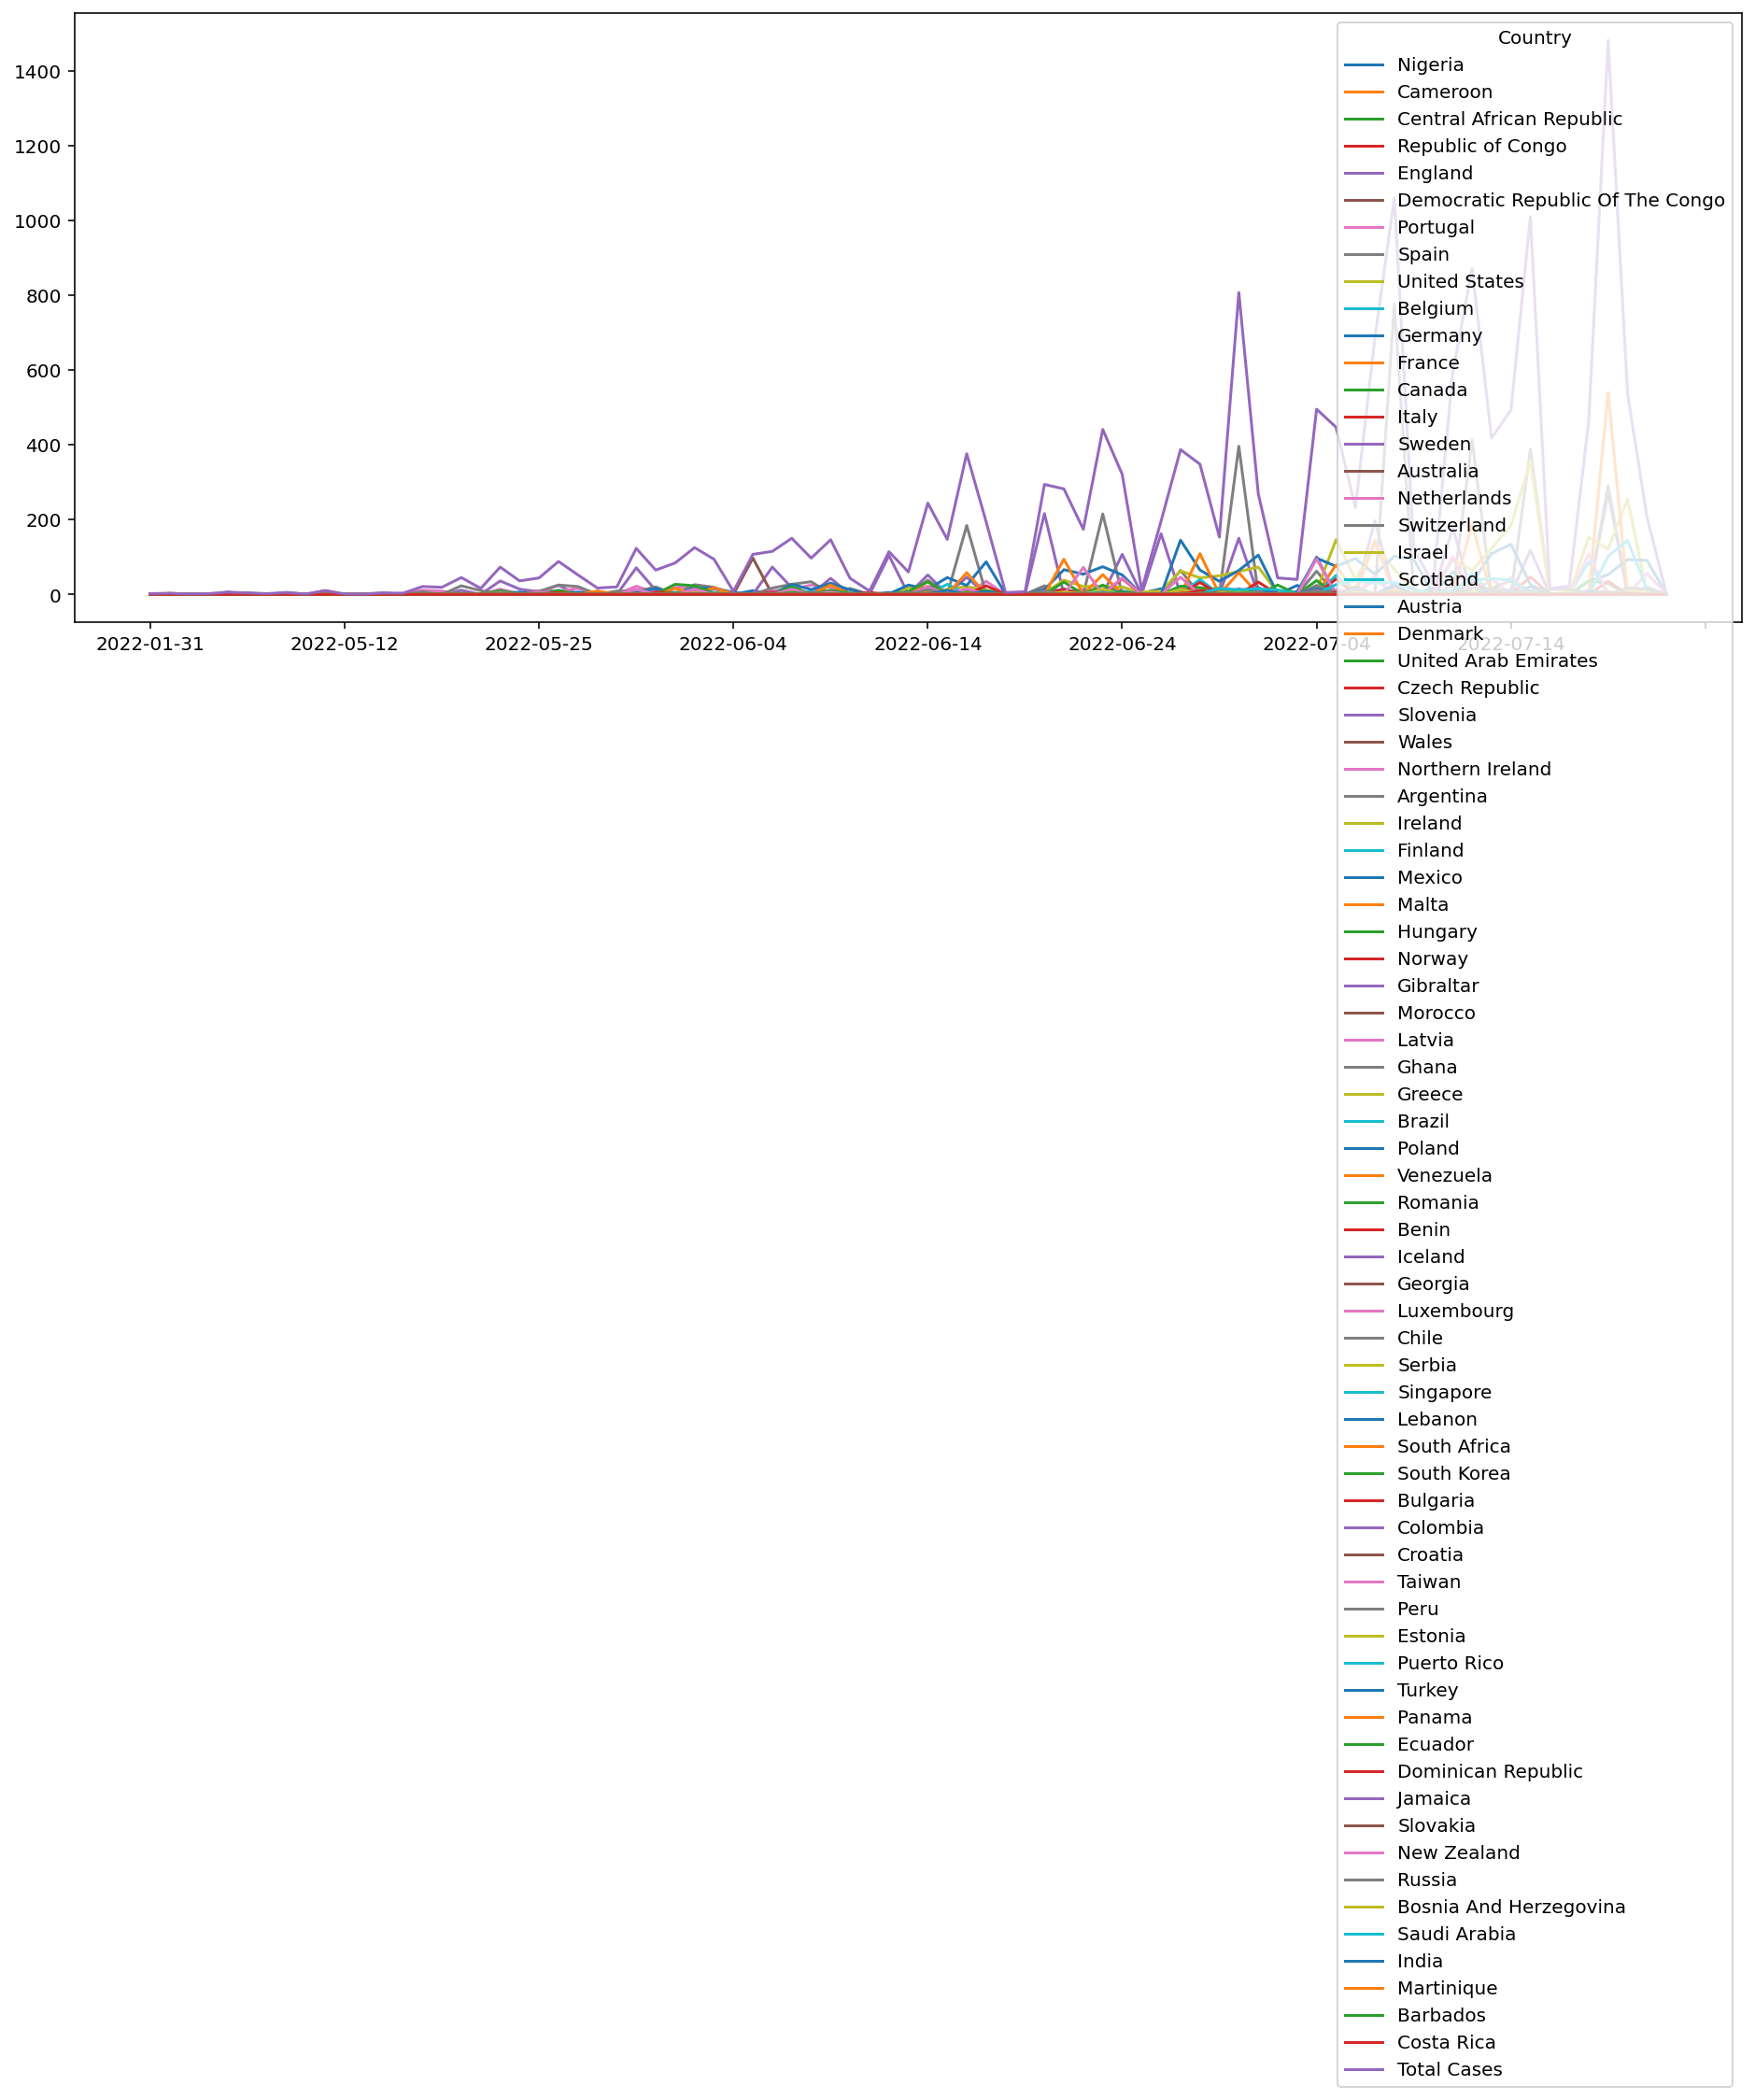

In [86]:
confirm_data.plot(figsize=(16, 6))
plt.show()

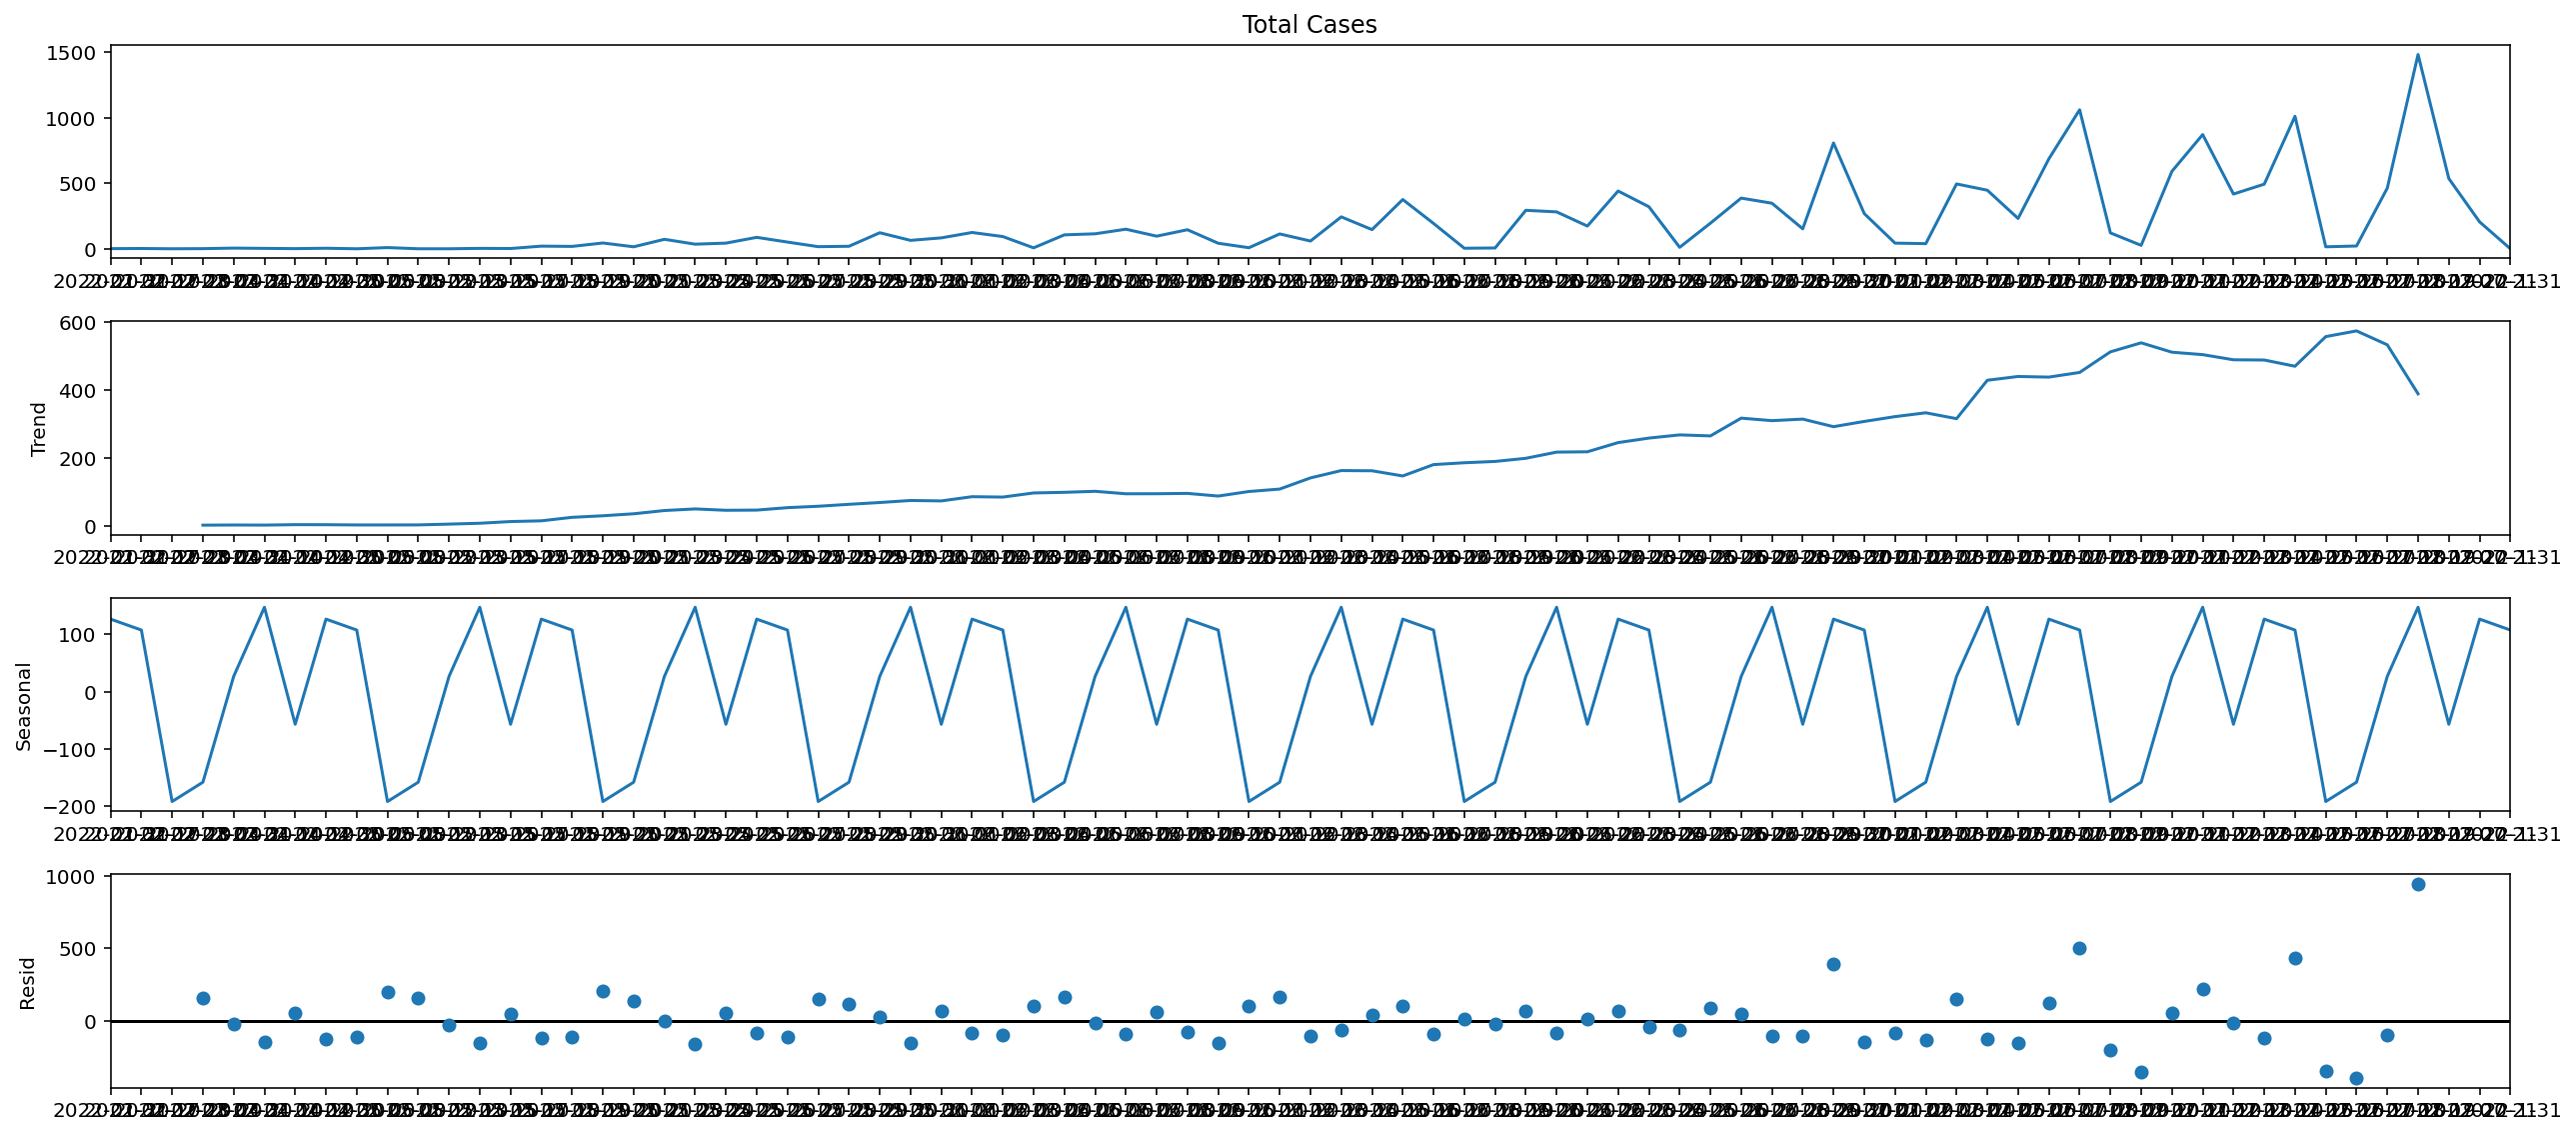

In [87]:
rcParams['figure.figsize'] = (18, 8)

decomposition = sm.tsa.seasonal_decompose(confirm_data['Total Cases'], model = 'additive',period=7)
fig = decomposition.plot()
plt.show()

## Inference:-

- We can conclude that the time series is non-stationary since it has seasonality present in it.
- Statastical test needs to be performed in order to prove that it is non-stationary.
- For this we can use Augmented Dickey-Fuller test.

#### How to implement Augmented Dickey-Fuller Test.

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. We set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

Null Hypothesis: The data is not stationary.

Alternative Hypothesis: The data is stationary.

In our case, for the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

p-value <= significance level (0.05) If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

In [88]:
passing_data=adfuller(confirm_data['Total Cases'])

def adf_test(cases):
    result=adfuller(cases)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [89]:
adf_test(confirm_data['Total Cases'])

Test parameters : 0.029820260301353586
p-value : 0.9609298123854614
#Lags Used : 6
Dataset observations : 72
Dataset is non-stationary 


0.96092981238546140.9609298123854614### Inference:-

- We have different output values which describes the nature of the dataset. Yet, we are only interested in the p-value.


- The p-value is 0.9609298123854614 which is greater than 0.05. Hence the time-series is non-stationary.


- So now we need to make the Time-Series stationary using different approach.

### Now we will implement Differencing.

This approach is used to find the difference between the current day cases and the previous day cases in the time series.

Here, we will difference only once, therefore our d=1.

In [90]:
confirm_data['Differencing']=confirm_data['Total Cases']-confirm_data['Total Cases'].shift(2)
confirm_data.head(20)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,New Zealand,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Costa Rica,Total Cases,Differencing
2022-01-31,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,NaN
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,-1.0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,5.0
2022-04-10,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2.0
2022-04-12,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,-4.0
2022-04-30,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1.0
2022-05-06,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.0
2022-05-08,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,10,5.0


In [91]:
adf_test(confirm_data['Differencing'].dropna())

Test parameters : -3.6891401008069935
p-value : 0.004268527508473763
#Lags Used : 6
Dataset observations : 70
Dataset is stationary


### Inference:-

- From the above analyzed test results we can observe that the p-value is 0.004268527508473763, which is less than 0.05, therefore the dataset has become stationary.

- We will now plot this new time series to see whether we have removed the seasonal components.

In [92]:
fig = px.line(confirm_data, y='Differencing',labels={'Total_cases':'Total Cases','index':'Date'},
              title='Monkey Pox Cases Reported Daily Over Time',color_discrete_sequence=['#6F2DBD'], markers=True)
fig.update_layout(hovermode="x")
fig.show()

### Implimenting ARIMA model.

We initialize the ARIMA model as ARIMA (p,d,q). So we need to get the values of these parameters. Here d=1, because we applied differencing once.

Getting the best ‘p’ and ‘q’ values:¶


We get the best value of q using an Autocorrelation Function (ACF) plot.


We get the best value of p using a Partial Autocorrelation Function (PACF) plot.


Let's plot ACF and PACF !!

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



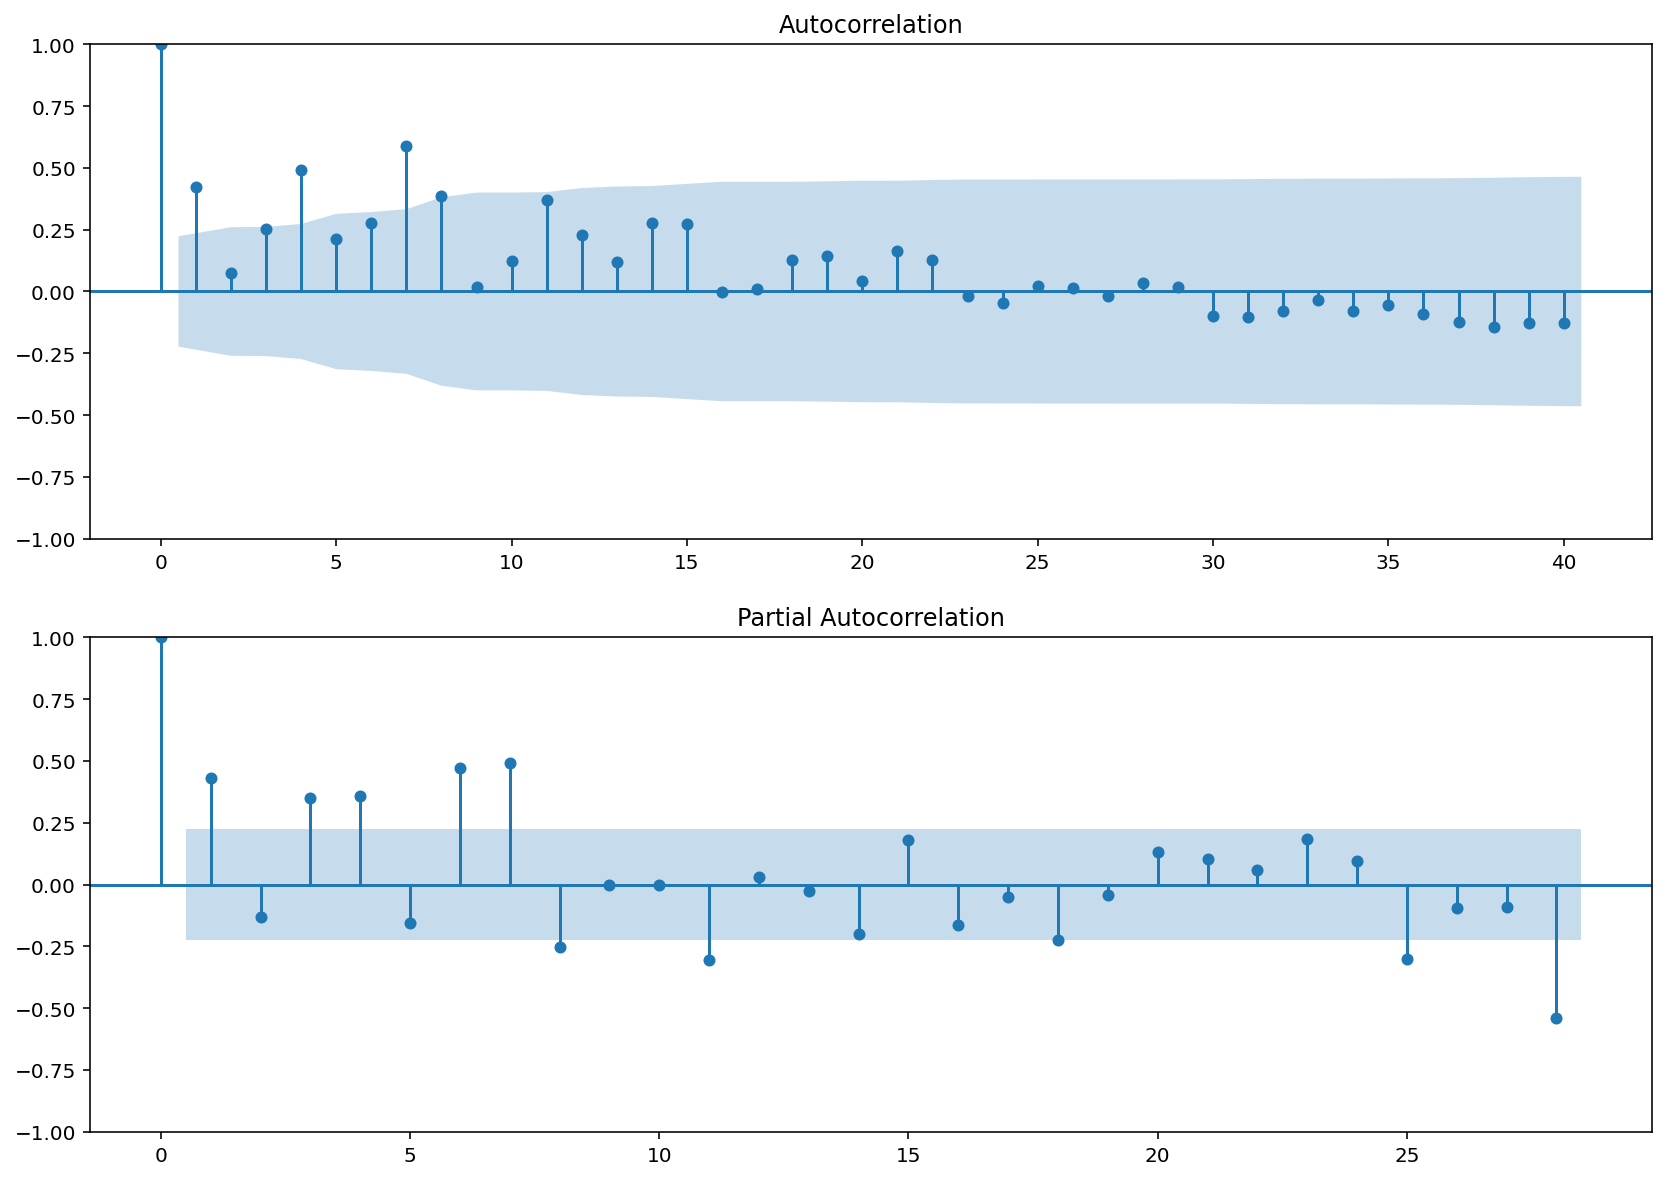

In [93]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(confirm_data['Total Cases'].iloc[2:],lags=40,ax=ax1)
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(confirm_data['Total Cases'].iloc[2:],lags=28,ax=ax1)

In [94]:
confirm_data.index = pd.DatetimeIndex(confirm_data.index).to_period('D')

### Splitting the dataset into Train and Test Set.¶

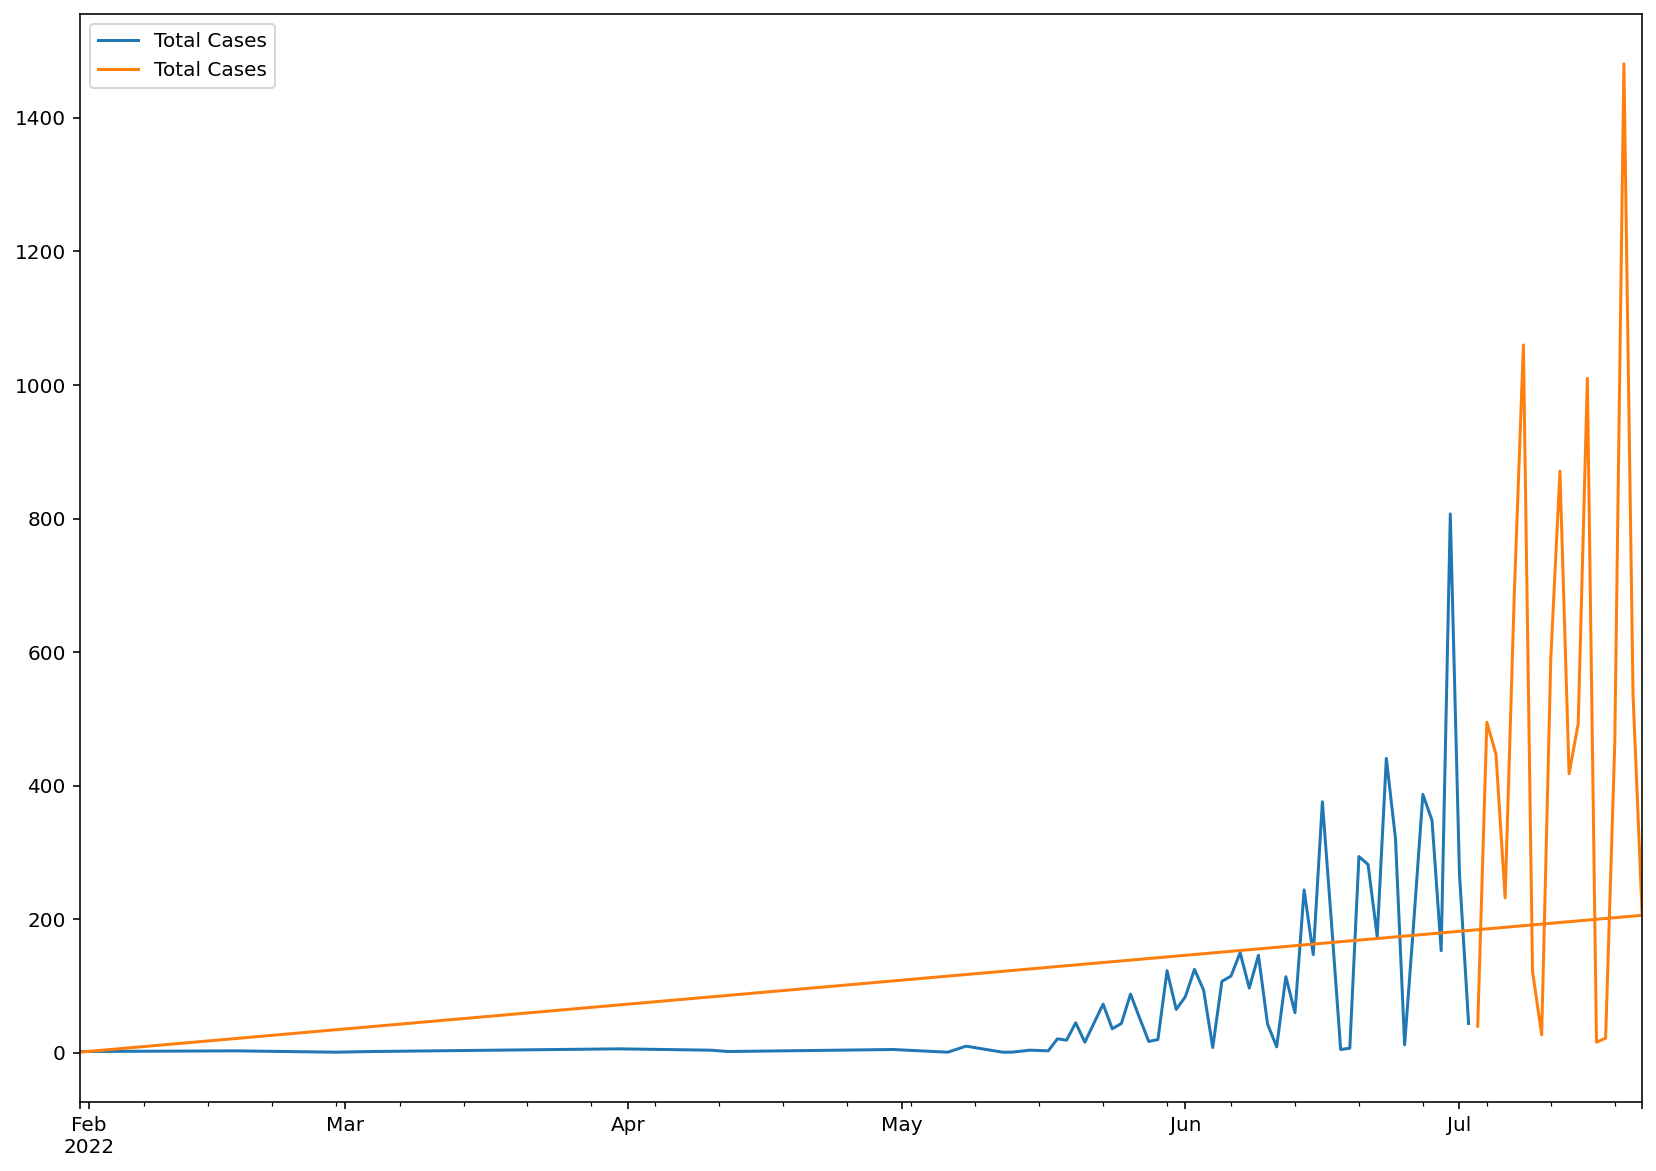

In [95]:
train = confirm_data[:int(0.75*(len(confirm_data)))]
test = confirm_data[int(0.75*(len(confirm_data))):]

#plotting the data
plt.figure(figsize=(14,10))
train['Total Cases'].plot()
test['Total Cases'].plot()
plt.legend()
plt.show()

### Training the ARIMA model.

In [96]:
model=sm.tsa.arima.ARIMA(confirm_data['Total Cases'],order=(9,1,4))
arima_model = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/stats

In [97]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Cases   No. Observations:                   79
Model:                 ARIMA(9, 1, 4)   Log Likelihood                -501.386
Date:                Sun, 24 Jul 2022   AIC                           1030.773
Time:                        19:03:08   BIC                           1063.767
Sample:                             0   HQIC                          1043.981
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0572      1.433     -0.738      0.461      -3.865       1.751
ar.L2         -0.6753      1.014     -0.666      0.505      -2.663       1.312
ar.L3         -0.3439      0.569     -0.604      0.546      -1.460       0.772
ar.L4         -0.0493      0.705     -0.070      0.944      -1.431       1.332
ar.L5          0.2488      0.682      0.365      0.715      -1.089       1.586
ar.L6          0.4499      0.845      0.533      0.594      -1.205       2.105
ar.L7          0.8254      0.560      1.475      0.140      -0.271       1.922
ar.L8          1.0148      1.353      0.750      0.453      -1.638       3.667
ar.L9          0.4162      1.073      0.388      0.698      -1.687       2.520
ma.L1          0.1949      1.352      0.144      0.885      -2.455       2.845
ma.L2         -0.4828      0.564     -0.856      0.392      -1.588       0.622
ma.L3         -0.7378      1.267     -0.582      0.560      -3.221       1.746
ma.L4          0.1370      0.483      0.284      0.777      -0.810       1.084
sigma2      2.364e+04   4772.651      4.953      0.000    1.43e+04     3.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               148.87
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              79.06   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Training ARIMA model.

In [98]:
model=sm.tsa.arima.ARIMA(confirm_data['Total Cases'],order=(9,1,4))
arima_model = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/stats

In [99]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Cases   No. Observations:                   79
Model:                 ARIMA(9, 1, 4)   Log Likelihood                -501.386
Date:                Sun, 24 Jul 2022   AIC                           1030.773
Time:                        19:03:10   BIC                           1063.767
Sample:                             0   HQIC                          1043.981
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0572      1.433     -0.738      0.461      -3.865       1.751
ar.L2         -0.6753      1.014     -0.666      0.505      -2.663       1.312
ar.L3         -0.3439      0.569     -0.604      0.546      -1.460       0.772
ar.L4         -0.0493      0.705     -0.070      0.944      -1.431       1.332
ar.L5          0.2488      0.682      0.365      0.715      -1.089       1.586
ar.L6          0.4499      0.845      0.533      0.594      -1.205       2.105
ar.L7          0.8254      0.560      1.475      0.140      -0.271       1.922
ar.L8          1.0148      1.353      0.750      0.453      -1.638       3.667
ar.L9          0.4162      1.073      0.388      0.698      -1.687       2.520
ma.L1          0.1949      1.352      0.144      0.885      -2.455       2.845
ma.L2         -0.4828      0.564     -0.856      0.392      -1.588       0.622
ma.L3         -0.7378      1.267     -0.582      0.560      -3.221       1.746
ma.L4          0.1370      0.483      0.284      0.777      -0.810       1.084
sigma2      2.364e+04   4772.651      4.953      0.000    1.43e+04     3.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               148.87
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              79.06   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

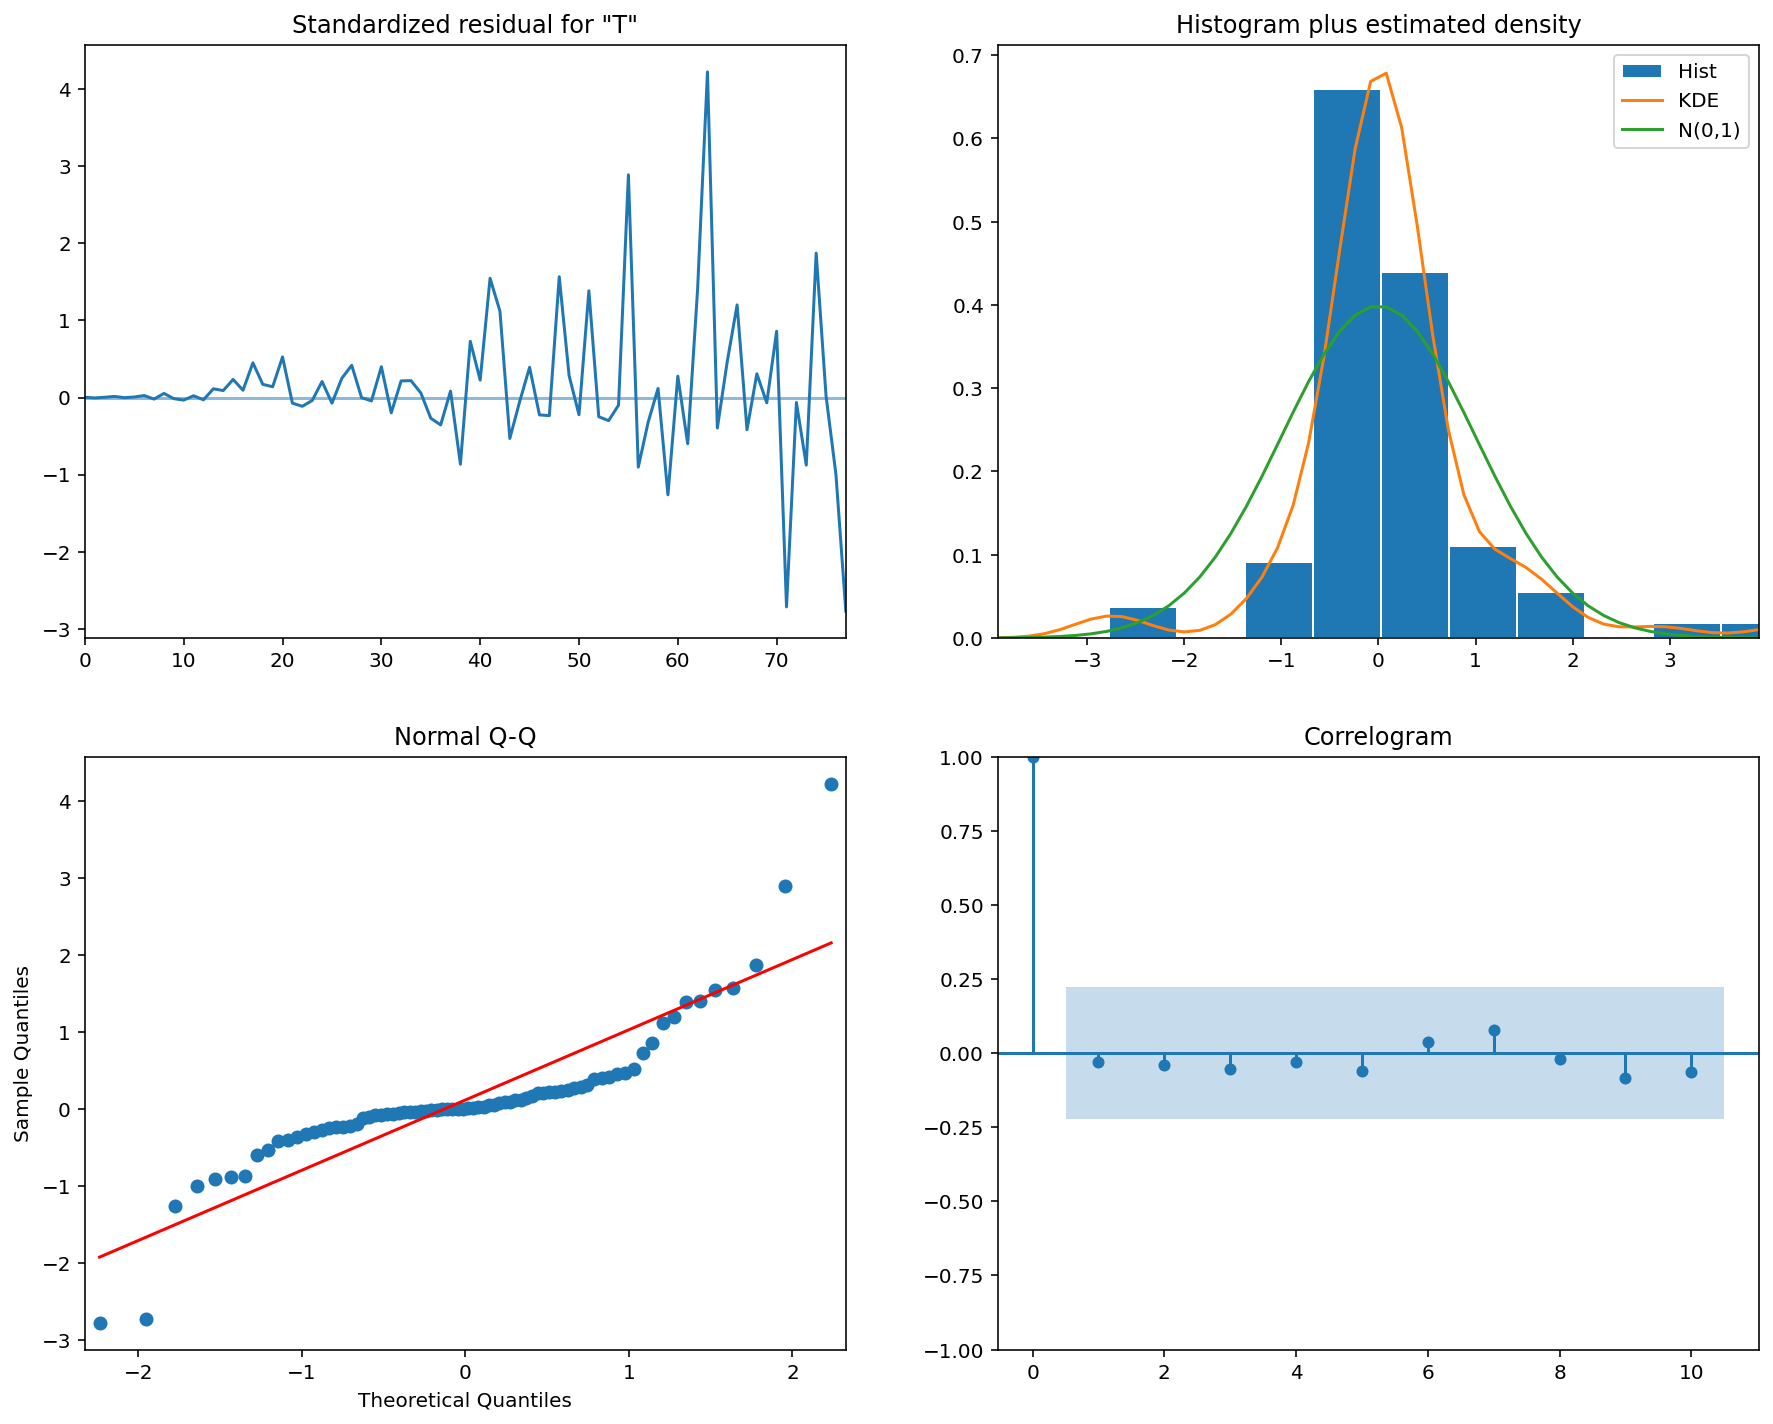

In [100]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [101]:
#from pylab import rcParams
#import statsmodels.api as sm

#rcParams['figure.figsize'] = 16, 8
#decomposition = sm.tsa.seasonal_decompose(confirm_data, model='additive', period=7)
#fig = decomposition.plot()
#plt.show()

In [102]:
#p = d = q = range(0, 2)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [103]:
#from statsmodels.tsa.stattools import adfuller
#dftest = adfuller(confirm_data, autolag = 'AIC')
#print("1. ADF : ",dftest[0])
#print("2. P-Value : ", dftest[1])
#print("3. Num Of Lags : ", dftest[2])
#print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
#print("5. Critical Values :")
#for key, val in dftest[4].items():
#    print("\t",key, ": ", val)

In [104]:
#from statsmodels.tsa.arima_model import ARIMA

#model = sm.tsa.arima.ARIMA(confirm_data, order=(1,1,1))
#result = model.fit()

In [105]:
#result.summary()

In [106]:
#mod = sm.tsa.statespace.SARIMAX(confirm_data,
#                                order=(0, 1, 1),
#                                seasonal_order=(1, 1, 1, 7),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False)
#results = mod.fit(disp=0)

In [107]:
#pred = result.get_prediction(start=pd.to_datetime('2022-06-08'), dynamic=False)
#pred

In [108]:
## Prediction using SARIMA model.
#pred_ci = pred.conf_int()
#ax = confirm_data.plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Total Confirmed Cases')
#plt.legend()
#plt.show()